In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function, division

In [3]:
import os

In [4]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(42)

# Загрузка данных

Тренировочные данные:

In [6]:
train_data = pd.read_csv("train_data.csv.zip", parse_dates=[0], index_col=0)

In [7]:
train_data.head()

,grate11-1,grate11-2,grate11-3,grate11-4,grate8-1,grate8-2,grate8-3,grate4-1,grate4-2,grate4-3,grate4-4,grate1-1,grate1-2,grate12-1,grate12-2,grate0-1,grate0-2,grate0-3,grate0-4,grate8-4
2016-10-01 11:51:00,576.66,574.27,571.85,573.63,580.35,571.88,575.56,572.36,560.89,558.54,568.07,557.42,563.67,578.05,575.76,544.41,549.9,551.03,549.22,573.93
2016-10-01 11:52:00,576.66,574.27,571.85,573.63,580.35,571.88,575.56,572.36,560.89,558.54,568.07,557.42,563.67,578.05,575.76,544.41,549.9,551.03,549.22,573.93
2016-10-01 11:53:00,576.66,574.27,571.85,573.63,580.35,571.88,575.56,572.36,560.89,558.54,568.07,557.42,563.67,578.05,575.76,544.41,549.9,551.03,549.22,573.93
2016-10-01 11:54:00,576.66,574.27,571.85,573.63,580.35,571.88,575.56,572.36,560.89,558.54,568.07,557.42,563.67,578.05,575.76,544.41,549.9,551.03,549.22,573.93
2016-10-01 11:55:00,576.66,574.27,571.85,573.63,580.35,571.88,575.56,572.36,560.89,558.54,568.07,557.42,563.67,578.05,575.76,544.41,549.9,551.03,549.22,573.93


Прогоны реактора в тренировочном периоде:

In [8]:
runs = pd.read_csv("train_runs.csv", index_col="run_id", parse_dates=["run_start", "run_end"])

In [9]:
runs

,run_start,run_end
run_id,,
0,2016-10-27 12:55:00,2016-12-14 00:16:00
1,2016-12-29 03:00:00,2017-02-12 00:10:00
2,2017-02-19 18:55:00,2017-04-13 00:00:00
3,2017-05-07 03:00:00,2017-08-06 00:10:00
4,2017-10-22 03:00:00,2018-01-08 00:10:00


Известные периоды закоксованности в тренировочном периоде:

In [10]:
cokes = pd.read_csv("train_coke.csv", parse_dates=["start", "end"])

In [11]:
cokes.head()

,sensor,start,end
0,grate0-1,2016-10-01 08:15:22,2016-10-15 03:45:00
1,grate0-1,2016-12-01 08:15:22,2016-12-16 00:16:00
2,grate0-1,2017-01-28 08:15:22,2017-02-14 00:10:00
3,grate0-1,2017-03-29 08:15:22,2017-04-15 00:00:00
4,grate0-2,2016-10-01 08:15:22,2016-10-15 03:45:00


Пример правильного формата решения для загрузки:

In [12]:
sample_submission = pd.read_csv("sample_submission.csv", index_col="frame_id")

In [13]:
sample_submission.head()

,grate0-1,grate0-2,grate0-3,grate0-4,grate1-1,grate1-2,grate11-1,grate11-2,grate11-3,grate11-4,grate12-1,grate12-2,grate4-1,grate4-2,grate4-3,grate4-4,grate8-1,grate8-2,grate8-3,grate8-4
frame_id,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Визуализируем данные

In [14]:
import sibur_utils

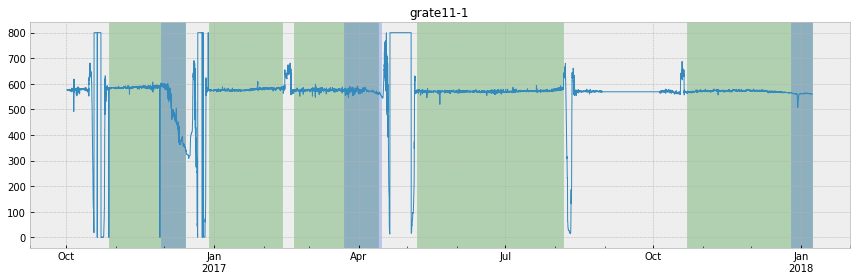

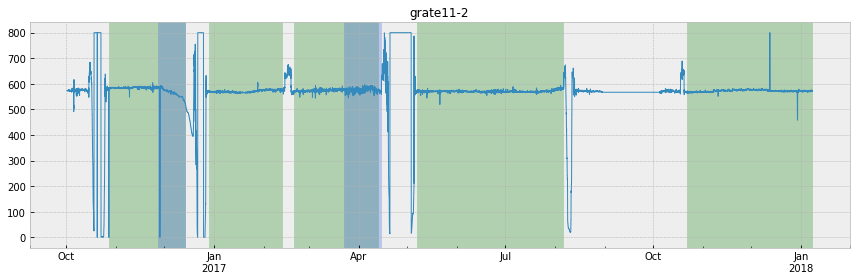

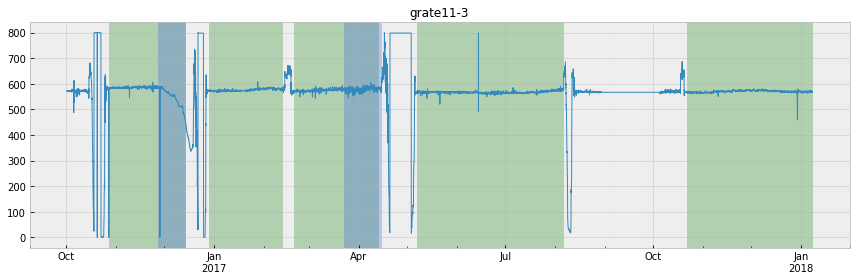

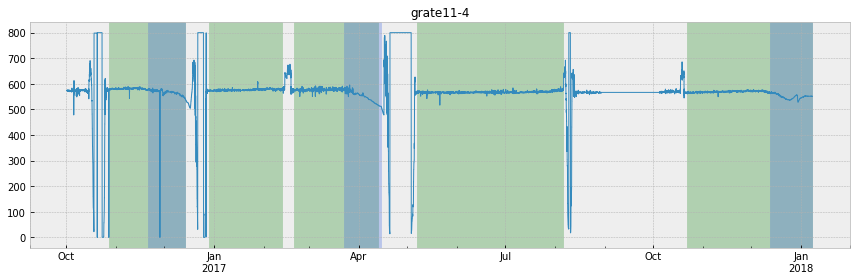

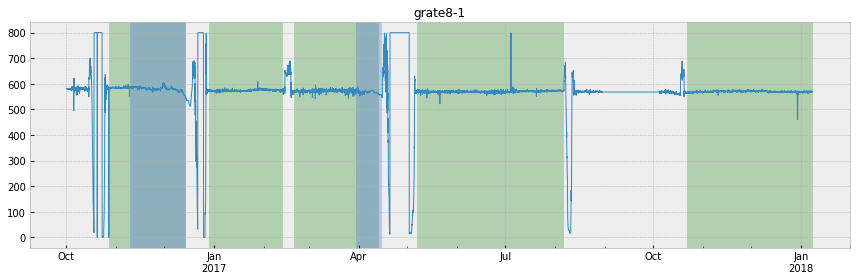

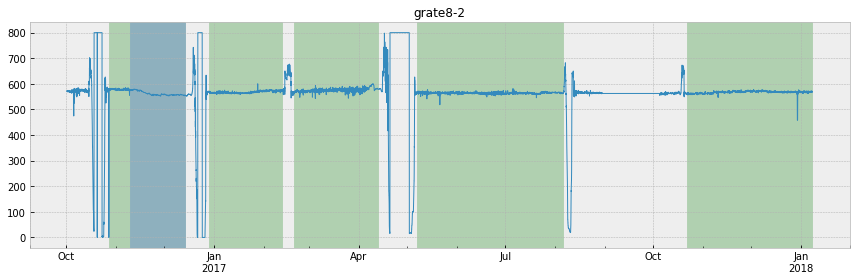

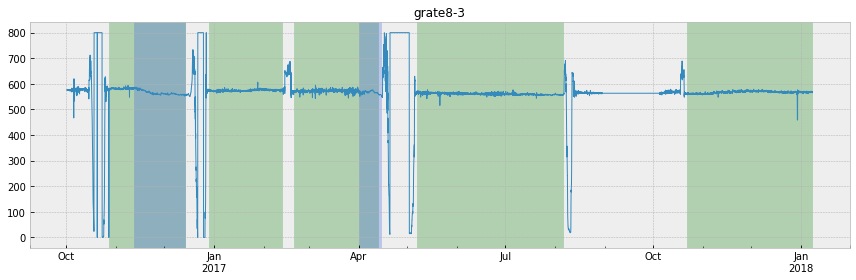

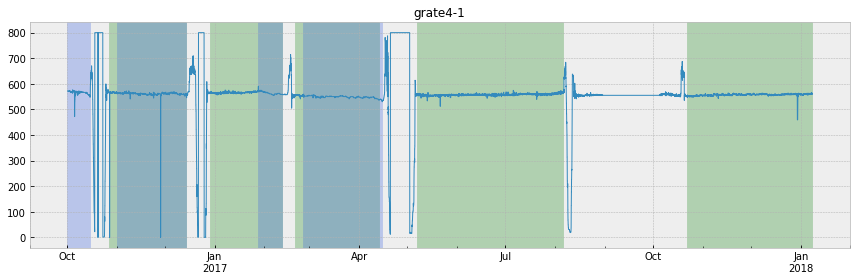

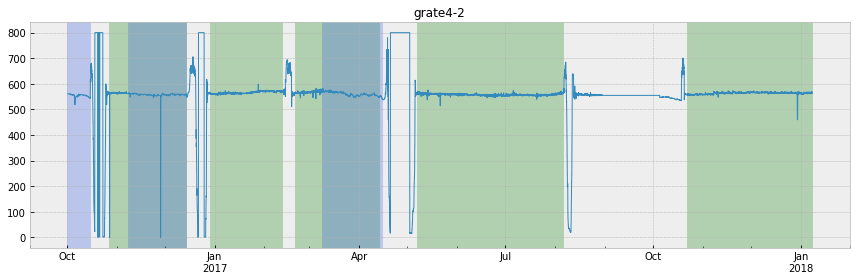

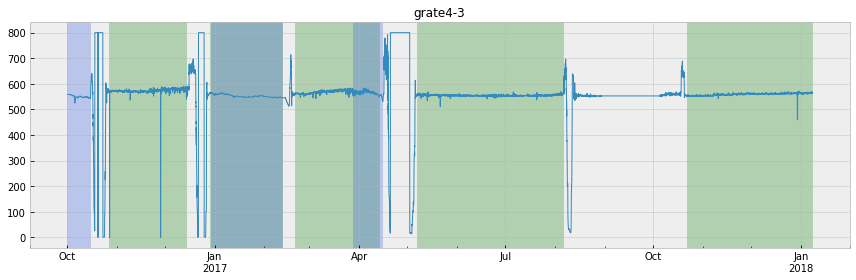

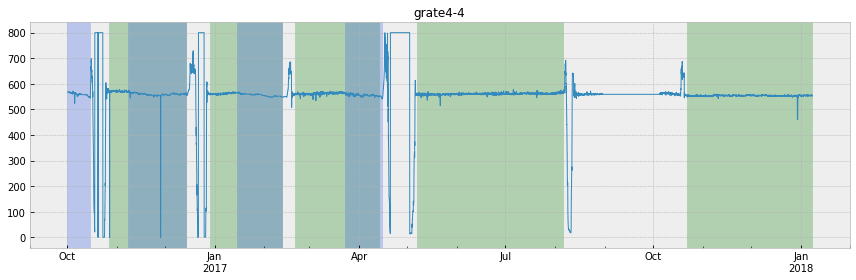

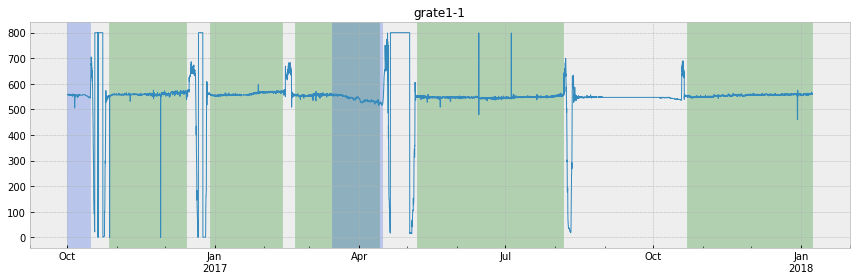

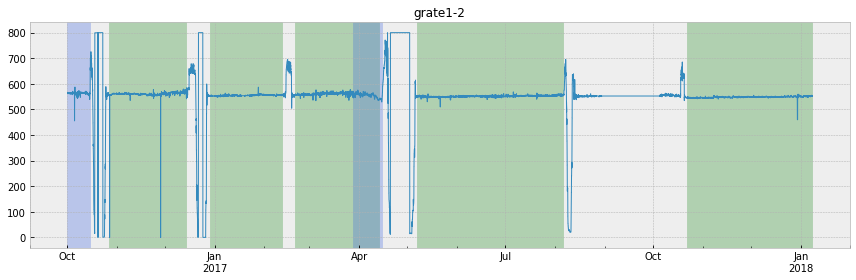

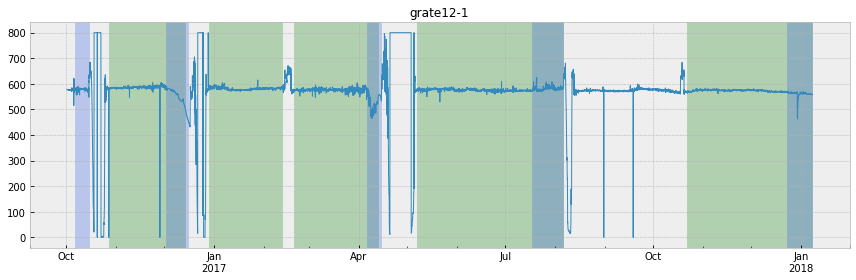

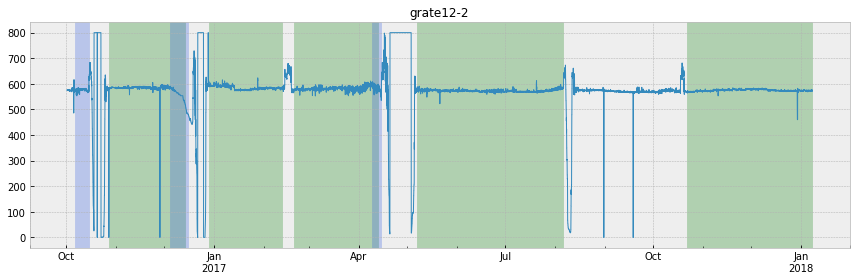

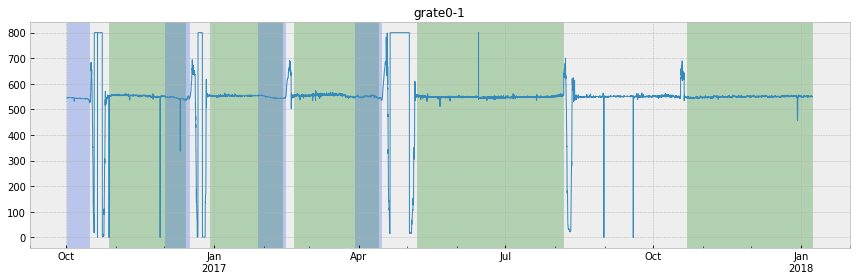

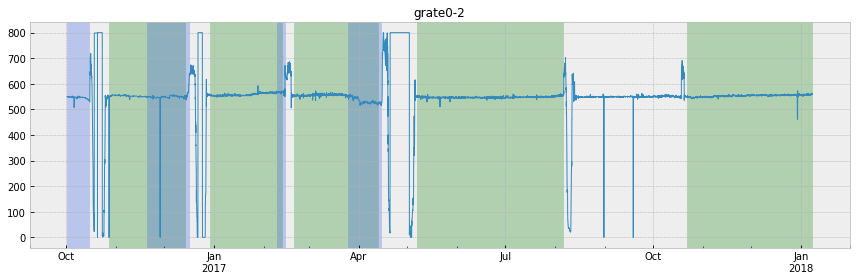

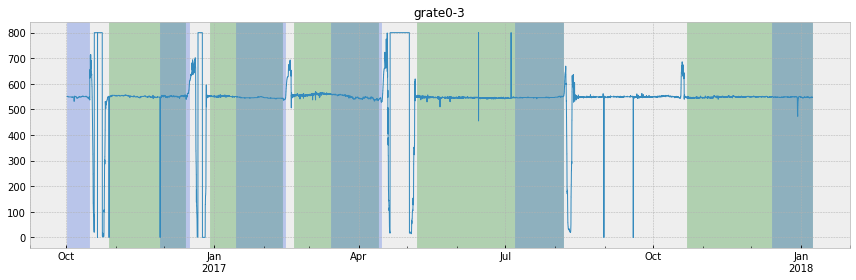

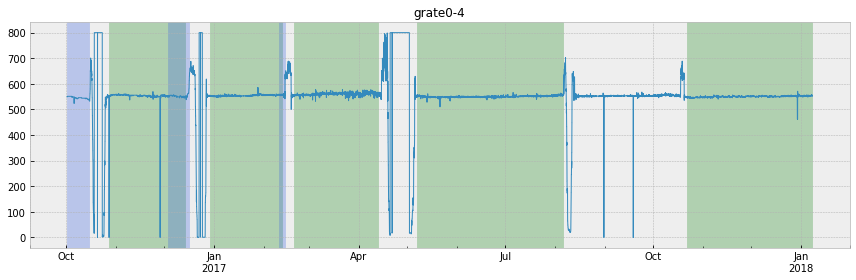

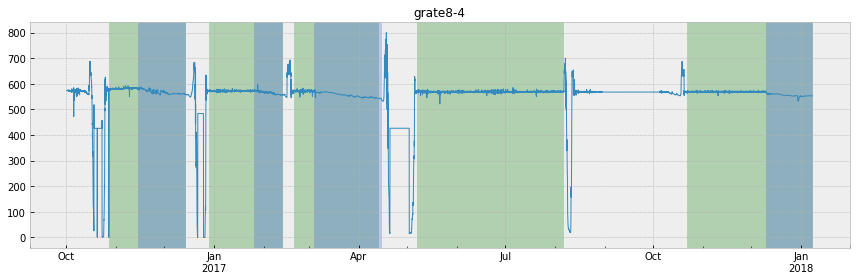

In [15]:
for cl in train_data.columns:
    sibur_utils.visualize(train_data[cl], runs, cokes[cokes.sensor==cl], cl)

# Подготовка тренировочных данных

Для тренировки модели:
- нарежем участки (фреймы) данных продолжительностью 24 часа,
- разделим фреймы на тренировочные и валидационные,
- для каждого участка посчитаем простые признаки,
- будем использовать градиентный бустинг, но не будет делать оптимизацию гипер-параметров.

Наиболее строгим было разбиение фреймов по прогонам: так, что некоторые прогоны полностью попадают в тренировочное множество, а некоторые - в валидационное. Обратите внимание, что в некоторых прогонах не все датчики были закоксованы, поэтому такое разбиение может сильно разбалансированным: количество фреймов, соответствующих закоксованным датчикам будет разным в тренировочном и валидационном множествах.

Например, в прогоне с `run_id=3` почти не было закоксованности. Учитывая это, мы выберем самое простое разбиение на тренировочное и валидационное сножества: выберем фреймы без перекрытий (чтобы исключить утечку данных из тренировочного множества в валидационное) и поделим их случайным образом между множествами.

В своем решении обязательно попробуйте более сложные способы валидации.

Например, для прогона 0:

In [16]:
ws = sibur_utils.select_windows(runs.loc[0, "run_start"], runs.loc[0, "run_end"], 40, verbose=False)

In [17]:
ws.head(15)

,start,end
0,2016-10-27 17:27:00,2016-10-28 17:26:00
1,2016-10-28 19:06:00,2016-10-29 19:05:00
2,2016-10-29 20:38:00,2016-10-30 20:37:00
3,2016-10-31 00:25:00,2016-11-01 00:24:00
4,2016-11-01 01:47:00,2016-11-02 01:46:00
5,2016-11-02 02:01:00,2016-11-03 02:00:00
6,2016-11-03 05:50:00,2016-11-04 05:49:00
7,2016-11-04 11:36:00,2016-11-05 11:35:00
8,2016-11-05 23:43:00,2016-11-06 23:42:00
9,2016-11-07 04:36:00,2016-11-08 04:35:00


Выберем окна для каждого прогона:

In [18]:
ratio = .9
windows = []

for run_id, run in runs.iterrows():

    days = (run["run_end"]-run["run_start"]).total_seconds()/(24.*3600.)
    num_windows = int(days*ratio)

    print("Run %i, duration:" % run_id, run["run_end"]-run["run_start"], days)
    print("Generating windows (%i)..." % num_windows)
    
    # Note, we use no_overlaps=False for training set
    ws = sibur_utils.select_windows(run["run_start"], run["run_end"], num_windows,
                                    no_overlaps=False, verbose=False)
    ws["run_id"] = run_id
    ws["run_start"] = run["run_start"]
    ws["run_end"] = run["run_end"]
    ws["since_run_start"] = (ws["start"] - run["run_start"]).dt.total_seconds()/(24.*3600.)
    windows.append(ws)

windows = pd.concat(windows, axis=0, ignore_index=True)

Run 0, duration: 47 days 11:21:00 47.47291666666667
Generating windows (42)...
Run 1, duration: 44 days 21:10:00 44.88194444444445
Generating windows (40)...
Run 2, duration: 52 days 05:05:00 52.21180555555556
Generating windows (46)...
Run 3, duration: 90 days 21:10:00 90.88194444444446
Generating windows (81)...
Run 4, duration: 77 days 21:10:00 77.88194444444444
Generating windows (70)...


In [19]:
train_size = 0.7

train_windows = windows.sample(int(windows.shape[0]*train_size), replace=False).sort_index()

In [20]:
train_windows.head()

,start,end,run_id,run_start,run_end,since_run_start
0,2016-11-04 04:06:00,2016-11-05 04:05:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,7.632639
1,2016-11-19 08:59:00,2016-11-20 08:58:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,22.836111
3,2016-11-17 02:41:00,2016-11-18 02:40:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,20.573611
6,2016-10-27 21:29:00,2016-10-28 21:28:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,0.356944
7,2016-12-09 02:18:00,2016-12-10 02:17:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,42.557639


In [21]:
train_windows.tail()

,start,end,run_id,run_start,run_end,since_run_start
271,2017-11-13 16:04:00,2017-11-14 16:03:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,22.544444
272,2017-11-13 11:53:00,2017-11-14 11:52:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,22.370139
273,2017-12-23 06:44:00,2017-12-24 06:43:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,62.155556
274,2017-11-26 10:06:00,2017-11-27 10:05:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,35.295833
275,2017-12-31 19:44:00,2018-01-01 19:43:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,70.697222


In [22]:
cv_windows = windows[~windows.index.isin(train_windows.index)]

In [23]:
cv_windows.head()

,start,end,run_id,run_start,run_end,since_run_start
2,2016-12-04 23:47:00,2016-12-05 23:46:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,38.452778
4,2016-11-07 17:50:00,2016-11-08 17:49:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,11.204861
5,2016-11-13 23:49:00,2016-11-14 23:48:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,17.454167
8,2016-12-13 03:26:00,2016-12-14 03:25:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,46.604861
11,2016-11-07 00:11:00,2016-11-08 00:10:00,0,2016-10-27 12:55:00,2016-12-14 00:16:00,10.469444


In [24]:
cv_windows.tail()

,start,end,run_id,run_start,run_end,since_run_start
268,2018-01-03 21:00:00,2018-01-04 20:59:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,73.750000
269,2017-12-30 15:44:00,2017-12-31 15:43:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,69.530556
276,2017-10-29 14:31:00,2017-10-30 14:30:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,7.479861
277,2018-01-04 08:12:00,2018-01-05 08:11:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,74.216667
278,2017-12-25 23:24:00,2017-12-26 23:23:00,4,2017-10-22 03:00:00,2018-01-08 00:10:00,64.850000


# Вычисляем целевую переменную

Периоды закоксованности даны отдельно,, поэтому для каждого фрейма мы должны вычислить, был ли датчик закоксован в следующую неделю после окончания фрейма (для каждого датчика).

In [25]:
sensors = train_data.columns.sort_values()

In [26]:
cokes.head()

,sensor,start,end
0,grate0-1,2016-10-01 08:15:22,2016-10-15 03:45:00
1,grate0-1,2016-12-01 08:15:22,2016-12-16 00:16:00
2,grate0-1,2017-01-28 08:15:22,2017-02-14 00:10:00
3,grate0-1,2017-03-29 08:15:22,2017-04-15 00:00:00
4,grate0-2,2016-10-01 08:15:22,2016-10-15 03:45:00


Обратите внимание, что мы учитываем границы прогонов:

In [27]:
def get_coke_period(start, end, run_end, all_coke_periods, sensors):
    """For given `start` and `end` calculate closest coke period in the future."""

    window_coke_candidates = all_coke_periods.loc[(all_coke_periods["end"]>=start)
                                                  & (all_coke_periods["start"]<run_end), ["sensor","start"]]
    return window_coke_candidates.set_index("sensor")["start"] - end

In [28]:
train_coke = train_windows.apply(lambda row: get_coke_period(row.start,
                                                             row.end,
                                                             row.run_end,
                                                             cokes,
                                                             sensors),
                                 axis=1)

In [29]:
cv_coke = cv_windows.apply(lambda row: get_coke_period(row.start,
                                                       row.end,
                                                       row.run_end,
                                                       cokes,
                                                       sensors),
                           axis=1)

In [30]:
train_coke.head()

,grate0-1,grate0-2,grate0-3,grate0-4,grate1-1,grate1-2,grate11-1,grate11-2,grate11-3,grate11-4,grate12-1,grate12-2,grate4-1,grate4-2,grate4-3,grate4-4,grate8-1,grate8-2,grate8-3,grate8-4
0,26 days 04:10:22,15 days 04:10:22,23 days 04:10:22,28 days 04:10:22,NaT,NaT,23 days 19:55:00,21 days 19:55:00,21 days 19:55:00,15 days 19:55:00,27 days 04:10:22,29 days 04:10:22,-5 days +19:55:00,2 days 19:55:00,NaT,2 days 19:55:00,4 days 19:55:00,4 days 19:55:00,6 days 19:55:00,9 days 19:55:00
1,10 days 23:17:22,-1 days +23:17:22,7 days 23:17:22,12 days 23:17:22,NaT,NaT,8 days 15:02:00,6 days 15:02:00,6 days 15:02:00,0 days 15:02:00,11 days 23:17:22,13 days 23:17:22,-20 days +15:02:00,-13 days +15:02:00,NaT,-13 days +15:02:00,-11 days +15:02:00,-11 days +15:02:00,-9 days +15:02:00,-6 days +15:02:00
3,13 days 05:35:22,2 days 05:35:22,10 days 05:35:22,15 days 05:35:22,NaT,NaT,10 days 21:20:00,8 days 21:20:00,8 days 21:20:00,2 days 21:20:00,14 days 05:35:22,16 days 05:35:22,-18 days +21:20:00,-11 days +21:20:00,NaT,-11 days +21:20:00,-9 days +21:20:00,-9 days +21:20:00,-7 days +21:20:00,-4 days +21:20:00
6,33 days 10:47:22,22 days 10:47:22,30 days 10:47:22,35 days 10:47:22,NaT,NaT,31 days 02:32:00,29 days 02:32:00,29 days 02:32:00,23 days 02:32:00,34 days 10:47:22,36 days 10:47:22,3 days 02:32:00,10 days 02:32:00,NaT,10 days 02:32:00,12 days 02:32:00,12 days 02:32:00,14 days 02:32:00,17 days 02:32:00
7,-9 days +05:58:22,-20 days +05:58:22,-12 days +05:58:22,-7 days +05:58:22,NaT,NaT,-12 days +21:43:00,-14 days +21:43:00,-14 days +21:43:00,-20 days +21:43:00,-8 days +05:58:22,-6 days +05:58:22,-40 days +21:43:00,-33 days +21:43:00,NaT,-33 days +21:43:00,-31 days +21:43:00,-31 days +21:43:00,-29 days +21:43:00,-26 days +21:43:00


In [31]:
cv_coke.head()

,grate0-1,grate0-2,grate0-3,grate0-4,grate1-1,grate1-2,grate11-1,grate11-2,grate11-3,grate11-4,grate12-1,grate12-2,grate4-1,grate4-2,grate4-3,grate4-4,grate8-1,grate8-2,grate8-3,grate8-4
2,-5 days +08:29:22,-16 days +08:29:22,-8 days +08:29:22,-3 days +08:29:22,NaT,NaT,-7 days +00:14:00,-9 days +00:14:00,-9 days +00:14:00,-15 days +00:14:00,-4 days +08:29:22,-2 days +08:29:22,-35 days +00:14:00,-28 days +00:14:00,NaT,-28 days +00:14:00,-26 days +00:14:00,-26 days +00:14:00,-24 days +00:14:00,-21 days +00:14:00
4,22 days 14:26:22,11 days 14:26:22,19 days 14:26:22,24 days 14:26:22,NaT,NaT,20 days 06:11:00,18 days 06:11:00,18 days 06:11:00,12 days 06:11:00,23 days 14:26:22,25 days 14:26:22,-8 days +06:11:00,-1 days +06:11:00,NaT,-1 days +06:11:00,1 days 06:11:00,1 days 06:11:00,3 days 06:11:00,6 days 06:11:00
5,16 days 08:27:22,5 days 08:27:22,13 days 08:27:22,18 days 08:27:22,NaT,NaT,14 days 00:12:00,12 days 00:12:00,12 days 00:12:00,6 days 00:12:00,17 days 08:27:22,19 days 08:27:22,-14 days +00:12:00,-7 days +00:12:00,NaT,-7 days +00:12:00,-5 days +00:12:00,-5 days +00:12:00,-3 days +00:12:00,0 days 00:12:00
8,-13 days +04:50:22,-24 days +04:50:22,-16 days +04:50:22,-11 days +04:50:22,NaT,NaT,-16 days +20:35:00,-18 days +20:35:00,-18 days +20:35:00,-24 days +20:35:00,-12 days +04:50:22,-10 days +04:50:22,-44 days +20:35:00,-37 days +20:35:00,NaT,-37 days +20:35:00,-35 days +20:35:00,-35 days +20:35:00,-33 days +20:35:00,-30 days +20:35:00
11,23 days 08:05:22,12 days 08:05:22,20 days 08:05:22,25 days 08:05:22,NaT,NaT,20 days 23:50:00,18 days 23:50:00,18 days 23:50:00,12 days 23:50:00,24 days 08:05:22,26 days 08:05:22,-8 days +23:50:00,-1 days +23:50:00,NaT,-1 days +23:50:00,1 days 23:50:00,1 days 23:50:00,3 days 23:50:00,6 days 23:50:00


Теперь для каждого фрейма мы знаем начало соответствующего периода закоксованности или что такого периода в прогоне не было (в этом случае мы видим `NaT`).

In [32]:
train_windows = train_windows.join((train_coke < pd.Timedelta(days=7)) & (train_coke.notnull()))
cv_windows = (cv_windows.join((cv_coke < pd.Timedelta(days=7)) & (cv_coke.notnull()))
              .reindex(train_windows.columns, axis=1)
              .fillna(False))

Посмотрим на статистику целевых переменных:

In [33]:
train_windows[train_coke.columns].mean()

grate0-1     0.246154
grate0-2     0.210256
grate0-3     0.517949
grate0-4     0.082051
grate1-1     0.102564
grate1-2     0.076923
grate11-1    0.200000
grate11-2    0.148718
grate11-3    0.148718
grate11-4    0.266667
grate12-1    0.276923
grate12-2    0.092308
grate4-1     0.405128
grate4-2     0.256410
grate4-3     0.241026
grate4-4     0.369231
grate8-1     0.194872
grate8-2     0.128205
grate8-3     0.194872
grate8-4     0.446154
dtype: float64

In [34]:
cv_windows[train_coke.columns].mean()

grate0-1     0.130952
grate0-2     0.154762
grate0-3     0.464286
grate0-4     0.047619
grate1-1     0.119048
grate1-2     0.071429
grate11-1    0.250000
grate11-2    0.142857
grate11-3    0.142857
grate11-4    0.321429
grate12-1    0.238095
grate12-2    0.059524
grate4-1     0.392857
grate4-2     0.297619
grate4-3     0.166667
grate4-4     0.309524
grate8-1     0.214286
grate8-2     0.154762
grate8-3     0.214286
grate8-4     0.535714
dtype: float64

Разбиение не идеальное, но давайте посмотрим, чего мы можем добиться с такими данными.

# Вычисляем признаки

Выберем очень простые признаки:

In [35]:
def jitter(d):
    """
    Calculate jitter.
    """
    
    return pd.Series(np.mean(np.abs(d.values[1:] - d.values[:-1]), axis=0),
                     index=["_".join([cl, "jitter"]) for cl in d.columns])

def get_trend(d):
    """
    Calcuate trend for a frame `d`.
    """

    dv = d.reset_index(drop=True)
    dv["minutes"] = np.arange(dv.shape[0], dtype=np.float64)
    covariance = dv.cov()
    return (((covariance["minutes"])/covariance.loc["minutes", "minutes"])[d.columns]
            .rename(lambda cl: "_".join([cl, "trend"])))

def get_features(frame):
    """
    Calculate simple features for dataframe.
    """
    
    average_sensors = frame.mean(axis=1)
    average_temp = average_sensors.mean()
    std_temp = average_sensors.std()
    min_temp = average_sensors.min()
    max_temp = average_sensors.max()

    features = []
    features.append(frame.mean().rename(lambda cl: "_".join([cl, "mean"])))
    features.append(frame.std().rename(lambda cl: "_".join([cl, "std"])))
    features.append(frame.min().rename(lambda cl: "_".join([cl, "min"])))
    features.append(frame.max().rename(lambda cl: "_".join([cl, "max"])))

    features.append(frame.mean().rename(lambda cl: "_".join([cl, "mean_norm"]))/average_temp)
    features.append(frame.std().rename(lambda cl: "_".join([cl, "std_norm"]))/std_temp)
    features.append(frame.min().rename(lambda cl: "_".join([cl, "min_norm"]))/min_temp)
    features.append(frame.max().rename(lambda cl: "_".join([cl, "max_norm"]))/max_temp)

    features.append(jitter(frame))
    features.append(get_trend(frame))
    features.append(jitter(frame).rename(lambda cl: "_".join([cl, "norm"]))/(max_temp-min_temp))

    features.append(average_sensors.apply(["mean", "std", "min", "max"]))
    return pd.concat(features)

## Признаки для тренировочного и валидационного множеств

In [36]:
train_features = train_windows.apply(lambda row: get_features(train_data.loc[row["start"]:row["end"]]), axis=1)
cv_features = cv_windows.apply(lambda row: get_features(train_data.loc[row["start"]:row["end"]]), axis=1)

## Признаки для тестового множества

In [37]:
!unzip -d test_frames test_frames.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
import glob
test_files = glob.glob("C:\_sibur\\data\\test_frames\\*")

In [38]:
test_features = {}
i=-1
for f in test_files:
    i+=1
    frame_id = os.path.splitext(f)[0].split('_')[1]
    frame_data = pd.read_csv(f)
    frame_features = get_features(frame_data)
    test_features[int(i)] = frame_features
test_features = pd.DataFrame.from_dict(test_features, orient="index")

test_features.index.name = "frame_id"

test_features.head()

,grate11-1_mean,grate11-2_mean,grate11-3_mean,grate11-4_mean,grate8-1_mean,grate8-2_mean,grate8-3_mean,grate4-1_mean,grate4-2_mean,grate4-3_mean,...,grate12-2_jitter_norm,grate0-1_jitter_norm,grate0-2_jitter_norm,grate0-3_jitter_norm,grate0-4_jitter_norm,grate8-4_jitter_norm,mean,std,min,max
frame_id,,,,,,,,,,,,,,,,,,,,,
0,571.344167,569.972840,569.349167,567.580306,568.024917,567.051375,561.421611,560.652479,560.692986,556.192549,...,0.004405,0.001895,0.003157,0.003642,0.002986,0.005358,561.061434,0.822462,559.1210,563.7705
1,571.563840,570.351097,569.320764,567.679868,568.239188,567.417250,560.981708,560.664347,561.518472,555.966972,...,0.006182,0.003826,0.004493,0.004295,0.004260,0.005495,561.489628,0.984297,558.9585,563.6405
2,571.044979,569.477035,568.839944,567.470201,567.983632,566.691194,560.782632,560.783958,560.188035,555.887410,...,0.005681,0.004126,0.003873,0.003257,0.003702,0.005634,561.441237,0.777716,559.8195,563.3275
3,565.022701,564.749424,562.826201,562.692625,563.511646,559.383319,559.863264,557.655687,549.166083,552.510792,...,0.008522,0.008707,0.006219,0.009218,0.009785,0.016275,556.787300,0.736369,555.1975,558.3820
4,565.547514,565.085944,562.489146,562.378896,563.837806,559.794042,559.379778,558.390819,549.497958,552.144694,...,0.007014,0.008505,0.008637,0.007950,0.008065,0.020577,556.803294,0.719020,555.2885,558.6025


## Анализ признаков

В этой задаче мы имеем дело с временными рядами, поэтому стоит ожидать, что для некоторых признаков распределения в тренировочном периоде и в тестовом периоде могут быть разными. Можно проверить это визуально, но мы воспользуется тестом [Колмогорова-Смирнова](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test). Отсечку установим на `p-value=0.001`.

In [51]:
from scipy.stats import ks_2samp

In [52]:
SIM_COLS = []

for col in train_features.columns:
    val, pval = ks_2samp(test_features[col].values, train_features[col].values)
    print(col, ":", pval, pval>0.001)
    if (pval>0.001) and (val<1.858):
        SIM_COLS.append(col)

grate11-1_mean : 8.350651336006721e-52 False
grate11-2_mean : 5.044323350598354e-47 False
grate11-3_mean : 2.3258395878579035e-27 False
grate11-4_mean : 3.273404792752073e-36 False
grate8-1_mean : 1.0915396149397243e-65 False
grate8-2_mean : 4.115078619274205e-27 False
grate8-3_mean : 1.4168296086769639e-16 False
grate4-1_mean : 2.6654396109908142e-08 False
grate4-2_mean : 1.7031262002462078e-31 False
grate4-3_mean : 1.5825639538839409e-24 False
grate4-4_mean : 7.675035610356587e-25 False
grate1-1_mean : 1.0868533963534471e-45 False
grate1-2_mean : 8.427464455563692e-49 False
grate12-1_mean : 1.778270740784129e-18 False
grate12-2_mean : 4.649426990001177e-60 False
grate0-1_mean : 1.0577458005994232e-40 False
grate0-2_mean : 1.083719957041873e-43 False
grate0-3_mean : 2.574499252306525e-23 False
grate0-4_mean : 2.397409985354814e-69 False
grate8-4_mean : 1.8990363802642906e-41 False
grate11-1_std : 8.639607153817264e-14 False
grate11-2_std : 1.836642341942714e-15 False
grate11-3_std : 1

In [53]:
SIM_COLS

['grate4-4_std',
 'grate12-1_std',
 'grate0-3_std',
 'grate8-3_std_norm',
 'grate4-3_std_norm',
 'grate4-4_std_norm',
 'grate0-1_std_norm',
 'grate8-4_std_norm',
 'grate11-3_min_norm',
 'grate0-1_min_norm',
 'grate8-4_min_norm',
 'grate11-3_max_norm',
 'grate8-2_max_norm',
 'grate11-1_jitter',
 'grate11-2_jitter',
 'grate11-3_jitter',
 'grate8-1_jitter',
 'grate8-2_jitter',
 'grate4-1_jitter',
 'grate1-2_jitter',
 'grate0-2_jitter',
 'grate0-4_jitter',
 'grate8-4_jitter',
 'grate11-1_trend',
 'grate11-2_trend',
 'grate11-3_trend',
 'grate11-4_trend',
 'grate8-1_trend',
 'grate8-2_trend',
 'grate8-3_trend',
 'grate4-1_trend',
 'grate4-2_trend',
 'grate4-3_trend',
 'grate4-4_trend',
 'grate1-1_trend',
 'grate1-2_trend',
 'grate12-1_trend',
 'grate12-2_trend',
 'grate0-1_trend',
 'grate0-2_trend',
 'grate0-3_trend',
 'grate0-4_trend',
 'grate8-4_trend',
 'grate11-1_jitter_norm',
 'grate11-2_jitter_norm',
 'grate8-1_jitter_norm',
 'grate8-2_jitter_norm',
 'grate8-3_jitter_norm',
 'grate4-1

# Подготовка признаков

In [54]:
fill_na_vals = train_features.mean()

In [55]:
train_features.fillna(fill_na_vals, inplace=True)
cv_features.fillna(fill_na_vals, inplace=True)
test_features.fillna(fill_na_vals, inplace=True)

# Построение модели

In [56]:
from sklearn.metrics import (classification_report,
                             accuracy_score)
from catboost import CatBoostClassifier

In [89]:
models = {}

for target in train_coke.columns:
    print("Target:", target)

    weights = (train_windows[target].value_counts().max()/train_windows[target].value_counts()).tolist()

    model = CatBoostClassifier(iterations=1000, max_depth=4,
                               verbose=False,
                               class_weights=weights,
                               early_stopping_rounds=50,
                               eval_metric="F1")
    model.fit(train_features[SIM_COLS].values, train_windows[target].astype(int),
              eval_set=(cv_features[SIM_COLS].values, cv_windows[target].astype(int)))
    
    tr_preds = model.predict(train_features[SIM_COLS].values)
    cv_preds = model.predict(cv_features[SIM_COLS].values)
   
    model.save_model('models\\'+str(target)+'.cbm', 
           format="cbm", 
           export_parameters=None,
           pool=None)
    
    models[target] = model
    
    print("Training set:")
    print(classification_report(train_windows[target], tr_preds))
    print(accuracy_score(train_windows[target], tr_preds))
    print("CV set:")
    print(classification_report(cv_windows[target], cv_preds))
    print(accuracy_score(cv_windows[target], cv_preds))
    
    print("\n\n")

Target: grate0-1
Training set:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       147
        True       0.98      1.00      0.99        48

   micro avg       0.99      0.99      0.99       195
   macro avg       0.99      1.00      0.99       195
weighted avg       0.99      0.99      0.99       195

0.9948717948717949
CV set:
              precision    recall  f1-score   support

       False       0.97      0.96      0.97        73
        True       0.75      0.82      0.78        11

   micro avg       0.94      0.94      0.94        84
   macro avg       0.86      0.89      0.87        84
weighted avg       0.94      0.94      0.94        84

0.9404761904761905



Target: grate0-2
Training set:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       154
        True       1.00      1.00      1.00        41

   micro avg       1.00      1.00      1.00       195
   macro avg     

Training set:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       116
        True       0.97      0.95      0.96        79

   micro avg       0.97      0.97      0.97       195
   macro avg       0.97      0.97      0.97       195
weighted avg       0.97      0.97      0.97       195

0.9692307692307692
CV set:
              precision    recall  f1-score   support

       False       0.98      0.94      0.96        51
        True       0.91      0.97      0.94        33

   micro avg       0.95      0.95      0.95        84
   macro avg       0.95      0.96      0.95        84
weighted avg       0.95      0.95      0.95        84

0.9523809523809523



Target: grate4-2
Training set:
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       145
        True       0.94      1.00      0.97        50

   micro avg       0.98      0.98      0.98       195
   macro avg       0.97      0.99 

Посмотрим на важность признаков дла какой-либо из моделей:

In [57]:
(pd.Series(models["grate1-2"].feature_importances_, index=SIM_COLS)
 .sort_values(ascending=False)
 .head(25))

NameError: name 'models' is not defined

# Предсказания для тестового множества

Мы использовали веса для классов, поэтому будет разумно поднять вероятность, при которой мы предсказываем закоксованность.

In [58]:
test_preds = {}

for target in train_coke.columns:
    local_preds = models[target].predict_proba(test_features[SIM_COLS].values)[:, 1]
    test_preds[target] = pd.Series(local_preds.astype(np.float),
                                   index=test_features.index)

NameError: name 'models' is not defined

In [102]:
train_coke.columns

Index(['grate0-1', 'grate0-2', 'grate0-3', 'grate0-4', 'grate1-1', 'grate1-2',
       'grate11-1', 'grate11-2', 'grate11-3', 'grate11-4', 'grate12-1',
       'grate12-2', 'grate4-1', 'grate4-2', 'grate4-3', 'grate4-4', 'grate8-1',
       'grate8-2', 'grate8-3', 'grate8-4'],
      dtype='object')

In [68]:
test_preds = pd.DataFrame.from_dict(test_preds)

In [69]:
test_preds.to_csv("baseline_submission_kEEEEK.csv")

# Что дальше?

Мы попробовали очень простой и прямолинейный подход. Подумайте, как вы можете его улучшить. Например, можно добавить признаков, использовать другую схему валидации или модель.

In [85]:
import matplotlib.pyplot as plt

corr = train_data.sort_index(axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,grate0-1,grate0-2,grate0-3,grate0-4,grate1-1,grate1-2,grate11-1,grate11-2,grate11-3,grate11-4,grate12-1,grate12-2,grate4-1,grate4-2,grate4-3,grate4-4,grate8-1,grate8-2,grate8-3,grate8-4
grate0-1,1,0.986693,0.991475,0.925303,0.989976,0.989509,0.7617,0.767693,0.732473,0.74644,0.772685,0.774414,0.932917,0.92447,0.924207,0.934185,0.921049,0.979759,0.92778,0.603335
grate0-2,0.986693,1,0.989712,0.924199,0.990522,0.989742,0.747735,0.761496,0.720518,0.737649,0.769556,0.768257,0.925175,0.9203,0.917312,0.928297,0.915,0.976234,0.924689,0.600793
grate0-3,0.991475,0.989712,1,0.923565,0.990216,0.991438,0.752288,0.763952,0.723519,0.743932,0.770763,0.770363,0.929888,0.923695,0.923805,0.932724,0.917161,0.977416,0.925113,0.601396
grate0-4,0.925303,0.924199,0.923565,1,0.923557,0.927589,0.695182,0.706255,0.693045,0.677183,0.71113,0.714433,0.864495,0.859924,0.860265,0.868774,0.854486,0.916499,0.863826,0.60772
grate1-1,0.989976,0.990522,0.990216,0.923557,1,0.99088,0.74704,0.761292,0.720341,0.744938,0.768686,0.767406,0.934062,0.930714,0.92476,0.93203,0.917848,0.979906,0.927185,0.607367
grate1-2,0.989509,0.989742,0.991438,0.927589,0.99088,1,0.749109,0.766492,0.723923,0.744703,0.770952,0.772385,0.931912,0.924343,0.924171,0.935071,0.920687,0.980684,0.930386,0.613324
grate11-1,0.7617,0.747735,0.752288,0.695182,0.74704,0.749109,1,0.945614,0.939118,0.800289,0.947347,0.946893,0.769516,0.771874,0.755562,0.769565,0.796195,0.77829,0.789088,0.508799
grate11-2,0.767693,0.761496,0.763952,0.706255,0.761292,0.766492,0.945614,1,0.970807,0.836173,0.981855,0.992352,0.819472,0.819814,0.813617,0.820462,0.839479,0.785542,0.83195,0.52587
grate11-3,0.732473,0.720518,0.723519,0.693045,0.720341,0.723923,0.939118,0.970807,1,0.810545,0.955166,0.96638,0.778318,0.779407,0.771368,0.77932,0.809596,0.750904,0.797109,0.500163
grate11-4,0.74644,0.737649,0.743932,0.677183,0.744938,0.744703,0.800289,0.836173,0.810545,1,0.842235,0.838289,0.80355,0.802896,0.793364,0.801598,0.808027,0.748801,0.807311,0.409062


In [ ]:
train_data.columns

In [ ]:
t_w = pd.Series(train_windows).astype(float)

In [92]:
kek = train_data

In [ ]:
from tsfresh import extract_features
extracted_features = extract_features(kek, column_id="index")

C:\Users\vkilyazo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Feature Extraction:   0%|                                                                       | 0/10 [00:00<?, ?it/s]

In [93]:
kek.reset_index(level=0, inplace=True)

In [94]:
kek["index"] = 0

In [ ]:
plt.plot(stdev(train_data))

In [58]:
model.predict_proba(cv_features[SIM_COLS].values)

array([[0.07791887, 0.92208113],
       [0.50269979, 0.49730021],
       [0.93018612, 0.06981388],
       [0.24535759, 0.75464241],
       [0.94916941, 0.05083059],
       [0.9100285 , 0.0899715 ],
       [0.67637981, 0.32362019],
       [0.35010253, 0.64989747],
       [0.74680149, 0.25319851],
       [0.85894537, 0.14105463],
       [0.77831968, 0.22168032],
       [0.94640115, 0.05359885],
       [0.70830375, 0.29169625],
       [0.85240365, 0.14759635],
       [0.64120335, 0.35879665],
       [0.66724822, 0.33275178],
       [0.98531326, 0.01468674],
       [0.98316642, 0.01683358],
       [0.22418242, 0.77581758],
       [0.86484751, 0.13515249],
       [0.1180364 , 0.8819636 ],
       [0.65332068, 0.34667932],
       [0.05929142, 0.94070858],
       [0.16053216, 0.83946784],
       [0.93841141, 0.06158859],
       [0.5042513 , 0.4957487 ],
       [0.01608692, 0.98391308],
       [0.73499993, 0.26500007],
       [0.8123787 , 0.1876213 ],
       [0.06461197, 0.93538803],
       [0.

['grate4-4_std',
 'grate12-1_std',
 'grate0-3_std',
 'grate8-3_std_norm',
 'grate4-3_std_norm',
 'grate4-4_std_norm',
 'grate0-1_std_norm',
 'grate8-4_std_norm',
 'grate11-3_min_norm',
 'grate0-1_min_norm',
 'grate8-4_min_norm',
 'grate11-3_max_norm',
 'grate8-2_max_norm',
 'grate11-1_jitter',
 'grate11-2_jitter',
 'grate11-3_jitter',
 'grate8-1_jitter',
 'grate8-2_jitter',
 'grate4-1_jitter',
 'grate1-2_jitter',
 'grate0-2_jitter',
 'grate0-4_jitter',
 'grate8-4_jitter',
 'grate11-1_trend',
 'grate11-2_trend',
 'grate11-3_trend',
 'grate11-4_trend',
 'grate8-1_trend',
 'grate8-2_trend',
 'grate8-3_trend',
 'grate4-1_trend',
 'grate4-2_trend',
 'grate4-3_trend',
 'grate4-4_trend',
 'grate1-1_trend',
 'grate1-2_trend',
 'grate12-1_trend',
 'grate12-2_trend',
 'grate0-1_trend',
 'grate0-2_trend',
 'grate0-3_trend',
 'grate0-4_trend',
 'grate8-4_trend',
 'grate11-1_jitter_norm',
 'grate11-2_jitter_norm',
 'grate8-1_jitter_norm',
 'grate8-2_jitter_norm',
 'grate8-3_jitter_norm',
 'grate4-1

In [82]:
from catboost import CatBoost
model.save_model(fname='mdl', format="cbm", export_parameters=None,pool=None)

In [83]:
from_file = CatBoostClassifier()

from_file.load_model("mdl.cbm")

In [84]:
from_file.predict_proba(test_features[SIM_COLS].values)[:, 1]

array([0.35536043, 0.41714589, 0.29963302, 0.18963365, 0.17684953,
       0.23104947, 0.26616107, 0.53844374, 0.23757439, 0.28917377,
       0.52083692, 0.17805347, 0.23461815, 0.29783825, 0.34483043,
       0.31274805, 0.2086264 , 0.20896071, 0.58706337, 0.20896071,
       0.278466  , 0.19061535, 0.19071286, 0.30881694, 0.23952098,
       0.1621627 , 0.2150794 , 0.22512485, 0.27151021, 0.23765036,
       0.24063279, 0.48017498, 0.32433525, 0.33958001, 0.4486039 ,
       0.30246553, 0.57092713, 0.61024502, 0.72338878, 0.5494068 ,
       0.52888879, 0.27062416, 0.54497778, 0.34750648, 0.29374015,
       0.27337574, 0.32396527, 0.53918196, 0.57083779, 0.53211996,
       0.60085385, 0.56159889, 0.60299555, 0.54362411, 0.56885481,
       0.62765628, 0.54293447, 0.44609135, 0.55780358, 0.60554387,
       0.60554387, 0.57911814, 0.55835099, 0.62016433, 0.60497262,
       0.61553031, 0.39498922, 0.57824459, 0.26377333, 0.6367698 ,
       0.53144124, 0.61753038, 0.54787024, 0.54196471, 0.65909

In [47]:



    #model = CatBoostClassifier(iterations=1000, max_depth=4,
     #                          verbose=False,
     #                          class_weights=weights,
      #                         early_stopping_rounds=50,
        #                       eval_metric="F1")

In [46]:
# this function runs grid search on several parameters
def catboost_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
    ps = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps.grid_search(['border_count']),
                      ps.grid_search(['ctr_border_count']),
                      ps.grid_search(['l2_leaf_reg']),
                      ps.grid_search(['iterations','learning_rate']),
                      ps.grid_search(['depth'])):
        res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        ps.register_result(res,prms)
        print(res,prms,'best:',ps.bestscore(),ps.bestparam())
    return ps.bestparam()

#bestparams = catboost_param_tune(params,train_set,train_label,cat_dims)

In [60]:
from catboost import Pool, cv

In [73]:
models = {}

for target in train_coke.columns:
    print("Target:", target)

    weights = (train_windows[target].value_counts().max()/train_windows[target].value_counts()).tolist()

    model = CatBoostClassifier(use_best_model = True,
                               class_weights=weights,
                               early_stopping_rounds=150,
                               eval_metric="F1")
    model.fit(train_features[SIM_COLS].values, train_windows[target].astype(int),
              eval_set=(cv_features[SIM_COLS].values, cv_windows[target].astype(int)))
    
    tr_preds = model.predict(train_features[SIM_COLS].values)
    cv_preds = model.predict(cv_features[SIM_COLS].values)
   
    model.save_model('models\\'+str(target)+'.cbm', 
           format="cbm", 
           export_parameters=None,
           pool=None)
    
    models[target] = model
    
    print("Training set:")
    print(classification_report(train_windows[target], tr_preds))
    print(accuracy_score(train_windows[target], tr_preds))
    print("CV set:")
    print(classification_report(cv_windows[target], cv_preds))
    print(accuracy_score(cv_windows[target], cv_preds))
    
    print("\n\n")

Target: grate0-1
Learning rate set to 0.065721
0:	learn: 0.8969815	test: 0.6431501	best: 0.6431501 (0)	total: 270ms	remaining: 4m 29s
1:	learn: 0.9254984	test: 0.7229508	best: 0.7229508 (1)	total: 462ms	remaining: 3m 50s
2:	learn: 0.9349163	test: 0.7922393	best: 0.7922393 (2)	total: 622ms	remaining: 3m 26s
3:	learn: 0.9477756	test: 0.8242220	best: 0.8242220 (3)	total: 903ms	remaining: 3m 44s
4:	learn: 0.9477756	test: 0.8242220	best: 0.8242220 (3)	total: 1.14s	remaining: 3m 46s
5:	learn: 0.9543389	test: 0.8711111	best: 0.8711111 (5)	total: 1.39s	remaining: 3m 50s
6:	learn: 0.9543389	test: 0.8076923	best: 0.8711111 (5)	total: 1.67s	remaining: 3m 57s
7:	learn: 0.9609937	test: 0.8588957	best: 0.8711111 (5)	total: 1.85s	remaining: 3m 49s
8:	learn: 0.9753354	test: 0.8711111	best: 0.8711111 (5)	total: 2.06s	remaining: 3m 47s
9:	learn: 0.9753354	test: 0.8836790	best: 0.8836790 (9)	total: 2.26s	remaining: 3m 44s
10:	learn: 0.9753354	test: 0.8711111	best: 0.8836790 (9)	total: 2.45s	remaining: 3m

94:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 18.1s	remaining: 2m 52s
95:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 18.3s	remaining: 2m 52s
96:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 18.5s	remaining: 2m 52s
97:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 18.7s	remaining: 2m 52s
98:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 18.9s	remaining: 2m 51s
99:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 19.1s	remaining: 2m 51s
100:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 19.2s	remaining: 2m 51s
101:	learn: 1.0000000	test: 0.8715415	best: 0.9236569 (27)	total: 19.4s	remaining: 2m 50s
102:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 19.6s	remaining: 2m 50s
103:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 19.8s	remaining: 2m 50s
104:	learn: 1.0000000	test: 0.8855422	best: 0.9236569 (27)	total: 19.9s	remaining: 2m 50s
105:	learn: 1.00

0:	learn: 0.9249249	test: 0.7845468	best: 0.7845468 (0)	total: 253ms	remaining: 4m 13s
1:	learn: 0.9333333	test: 0.8443695	best: 0.8443695 (1)	total: 429ms	remaining: 3m 33s
2:	learn: 0.9418960	test: 0.8202397	best: 0.8443695 (1)	total: 594ms	remaining: 3m 17s
3:	learn: 0.9535604	test: 0.8432580	best: 0.8443695 (1)	total: 817ms	remaining: 3m 23s
4:	learn: 0.9476923	test: 0.8354430	best: 0.8443695 (1)	total: 1.01s	remaining: 3m 21s
5:	learn: 0.9506173	test: 0.8517337	best: 0.8517337 (5)	total: 1.24s	remaining: 3m 26s
6:	learn: 0.9655172	test: 0.8512206	best: 0.8517337 (5)	total: 1.41s	remaining: 3m 20s
7:	learn: 0.9808917	test: 0.8760370	best: 0.8760370 (7)	total: 1.65s	remaining: 3m 24s
8:	learn: 0.9935484	test: 0.9421176	best: 0.9421176 (8)	total: 1.83s	remaining: 3m 21s
9:	learn: 0.9935484	test: 0.9421176	best: 0.9421176 (8)	total: 2.05s	remaining: 3m 23s
10:	learn: 0.9967638	test: 0.9512948	best: 0.9512948 (10)	total: 2.2s	remaining: 3m 18s
11:	learn: 0.9967638	test: 0.9512948	best:

93:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 19.5s	remaining: 3m 8s
94:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 19.8s	remaining: 3m 8s
95:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 19.9s	remaining: 3m 7s
96:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 20.2s	remaining: 3m 7s
97:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 20.5s	remaining: 3m 8s
98:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 20.7s	remaining: 3m 8s
99:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 21s	remaining: 3m 8s
100:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 21.2s	remaining: 3m 8s
101:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 21.4s	remaining: 3m 8s
102:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 21.6s	remaining: 3m 7s
103:	learn: 1.0000000	test: 0.9701963	best: 0.9701963 (15)	total: 21.8s	remaining: 3m 7s
104:	learn: 1.0000000	test: 0.

10:	learn: 0.9617159	test: 0.8406053	best: 0.8635554 (3)	total: 2.3s	remaining: 3m 26s
11:	learn: 0.9668376	test: 0.8899799	best: 0.8899799 (11)	total: 2.53s	remaining: 3m 28s
12:	learn: 0.9565432	test: 0.8756853	best: 0.8899799 (11)	total: 2.7s	remaining: 3m 25s
13:	learn: 0.9654966	test: 0.8756853	best: 0.8899799 (11)	total: 2.92s	remaining: 3m 25s
14:	learn: 0.9854144	test: 0.8863079	best: 0.8899799 (11)	total: 3.08s	remaining: 3m 22s
15:	learn: 0.9904388	test: 0.8863079	best: 0.8899799 (11)	total: 3.26s	remaining: 3m 20s
16:	learn: 0.9803397	test: 0.8756853	best: 0.8899799 (11)	total: 3.42s	remaining: 3m 17s
17:	learn: 0.9803397	test: 0.8863079	best: 0.8899799 (11)	total: 3.6s	remaining: 3m 16s
18:	learn: 0.9854144	test: 0.9006369	best: 0.9006369 (18)	total: 3.75s	remaining: 3m 13s
19:	learn: 0.9904388	test: 0.9006369	best: 0.9006369 (18)	total: 3.93s	remaining: 3m 12s
20:	learn: 0.9954137	test: 0.8863079	best: 0.9006369 (18)	total: 4.13s	remaining: 3m 12s
21:	learn: 0.9954137	test

104:	learn: 1.0000000	test: 0.9197804	best: 0.9341966 (31)	total: 20s	remaining: 2m 50s
105:	learn: 1.0000000	test: 0.9197804	best: 0.9341966 (31)	total: 20.3s	remaining: 2m 50s
106:	learn: 1.0000000	test: 0.9197804	best: 0.9341966 (31)	total: 20.5s	remaining: 2m 51s
107:	learn: 1.0000000	test: 0.9197804	best: 0.9341966 (31)	total: 20.8s	remaining: 2m 51s
108:	learn: 1.0000000	test: 0.9197804	best: 0.9341966 (31)	total: 20.9s	remaining: 2m 51s
109:	learn: 1.0000000	test: 0.9341966	best: 0.9341966 (31)	total: 21.1s	remaining: 2m 50s
110:	learn: 1.0000000	test: 0.9341966	best: 0.9341966 (31)	total: 21.3s	remaining: 2m 50s
111:	learn: 1.0000000	test: 0.9341966	best: 0.9341966 (31)	total: 21.5s	remaining: 2m 50s
112:	learn: 1.0000000	test: 0.9341966	best: 0.9341966 (31)	total: 21.7s	remaining: 2m 50s
113:	learn: 1.0000000	test: 0.9341966	best: 0.9341966 (31)	total: 21.9s	remaining: 2m 49s
114:	learn: 1.0000000	test: 0.9341966	best: 0.9341966 (31)	total: 22.1s	remaining: 2m 49s
115:	learn: 

4:	learn: 0.9944444	test: 0.6291740	best: 0.6291740 (4)	total: 1.18s	remaining: 3m 54s
5:	learn: 0.9916898	test: 0.6291740	best: 0.6291740 (4)	total: 1.39s	remaining: 3m 49s
6:	learn: 0.9972145	test: 0.6381462	best: 0.6381462 (6)	total: 1.57s	remaining: 3m 42s
7:	learn: 0.9944444	test: 0.6381462	best: 0.6381462 (6)	total: 1.79s	remaining: 3m 41s
8:	learn: 0.9944444	test: 0.6473779	best: 0.6473779 (8)	total: 1.98s	remaining: 3m 37s
9:	learn: 0.9972145	test: 0.6473779	best: 0.6473779 (8)	total: 2.16s	remaining: 3m 33s
10:	learn: 1.0000000	test: 0.6568807	best: 0.6568807 (10)	total: 2.33s	remaining: 3m 29s
11:	learn: 1.0000000	test: 0.6568807	best: 0.6568807 (10)	total: 2.54s	remaining: 3m 28s
12:	learn: 1.0000000	test: 0.6568807	best: 0.6568807 (10)	total: 2.77s	remaining: 3m 29s
13:	learn: 1.0000000	test: 0.6568807	best: 0.6568807 (10)	total: 3.01s	remaining: 3m 32s
14:	learn: 1.0000000	test: 0.6568807	best: 0.6568807 (10)	total: 3.21s	remaining: 3m 30s
15:	learn: 1.0000000	test: 0.6568

98:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 21.2s	remaining: 3m 12s
99:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 21.3s	remaining: 3m 11s
100:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 21.6s	remaining: 3m 12s
101:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 21.7s	remaining: 3m 11s
102:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 21.9s	remaining: 3m 10s
103:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 22.2s	remaining: 3m 10s
104:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 22.4s	remaining: 3m 10s
105:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 22.6s	remaining: 3m 10s
106:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 22.8s	remaining: 3m 10s
107:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 22.9s	remaining: 3m 9s
108:	learn: 1.0000000	test: 0.6666667	best: 0.6666667 (24)	total: 23.2s	remaining: 3m 9s
109:	learn: 1.

5:	learn: 0.9887006	test: 0.9776536	best: 0.9831461 (2)	total: 2.22s	remaining: 6m 7s
6:	learn: 0.9887006	test: 0.9251101	best: 0.9831461 (2)	total: 2.4s	remaining: 5m 39s
7:	learn: 0.9943182	test: 0.9831461	best: 0.9831461 (2)	total: 2.59s	remaining: 5m 20s
8:	learn: 0.9943182	test: 0.9887006	best: 0.9887006 (8)	total: 2.8s	remaining: 5m 8s
9:	learn: 0.9943182	test: 0.9887006	best: 0.9887006 (8)	total: 3s	remaining: 4m 56s
10:	learn: 0.9943182	test: 0.9361070	best: 0.9887006 (8)	total: 3.23s	remaining: 4m 50s
11:	learn: 0.9943182	test: 0.9361070	best: 0.9887006 (8)	total: 3.42s	remaining: 4m 41s
12:	learn: 0.9971510	test: 0.9361070	best: 0.9887006 (8)	total: 3.64s	remaining: 4m 36s
13:	learn: 0.9971510	test: 0.9361070	best: 0.9887006 (8)	total: 3.84s	remaining: 4m 30s
14:	learn: 0.9971510	test: 0.9361070	best: 0.9887006 (8)	total: 4s	remaining: 4m 22s
15:	learn: 0.9971510	test: 0.9361070	best: 0.9887006 (8)	total: 4.15s	remaining: 4m 15s
16:	learn: 0.9971510	test: 0.9361070	best: 0.98

99:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 20.5s	remaining: 3m 4s
100:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 20.7s	remaining: 3m 4s
101:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 20.9s	remaining: 3m 4s
102:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 21.1s	remaining: 3m 3s
103:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 21.2s	remaining: 3m 3s
104:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 21.4s	remaining: 3m 2s
105:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 21.6s	remaining: 3m 2s
106:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 21.8s	remaining: 3m 1s
107:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 22s	remaining: 3m 1s
108:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 22.2s	remaining: 3m 1s
109:	learn: 1.0000000	test: 0.9361070	best: 0.9887006 (8)	total: 22.4s	remaining: 3m 1s
110:	learn: 1.0000000	test: 0.93610

24:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 4.91s	remaining: 3m 11s
25:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 5.07s	remaining: 3m 9s
26:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 5.29s	remaining: 3m 10s
27:	learn: 0.9972299	test: 0.8955224	best: 0.8955224 (7)	total: 5.47s	remaining: 3m 10s
28:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 5.65s	remaining: 3m 9s
29:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 5.84s	remaining: 3m 8s
30:	learn: 0.9972299	test: 0.8955224	best: 0.8955224 (7)	total: 6.01s	remaining: 3m 8s
31:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 6.18s	remaining: 3m 6s
32:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 6.34s	remaining: 3m 5s
33:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 6.55s	remaining: 3m 6s
34:	learn: 0.9972299	test: 0.8888889	best: 0.8955224 (7)	total: 6.7s	remaining: 3m 4s
35:	learn: 0.9972299	test: 0.8888889	best

117:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 21.7s	remaining: 2m 42s
118:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 21.8s	remaining: 2m 41s
119:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 22s	remaining: 2m 41s
120:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 22.2s	remaining: 2m 41s
121:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 22.4s	remaining: 2m 41s
122:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 22.6s	remaining: 2m 40s
123:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 22.7s	remaining: 2m 40s
124:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 22.9s	remaining: 2m 40s
125:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 23.1s	remaining: 2m 40s
126:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 23.3s	remaining: 2m 40s
127:	learn: 1.0000000	test: 0.9022556	best: 0.9022556 (49)	total: 23.5s	remaining: 2m 39s
128:	learn: 

0:	learn: 0.9240122	test: 0.8622754	best: 0.8622754 (0)	total: 292ms	remaining: 4m 51s
1:	learn: 0.9440994	test: 0.8727273	best: 0.8727273 (1)	total: 529ms	remaining: 4m 23s
2:	learn: 0.9541284	test: 0.8888889	best: 0.8888889 (2)	total: 725ms	remaining: 4m 1s
3:	learn: 0.9659443	test: 0.8994083	best: 0.8994083 (3)	total: 898ms	remaining: 3m 43s
4:	learn: 0.9750000	test: 0.9101796	best: 0.9101796 (4)	total: 1.23s	remaining: 4m 4s
5:	learn: 0.9719626	test: 0.9101796	best: 0.9101796 (4)	total: 1.47s	remaining: 4m 2s
6:	learn: 0.9750000	test: 0.8834356	best: 0.9101796 (4)	total: 1.64s	remaining: 3m 53s
7:	learn: 0.9719626	test: 0.9101796	best: 0.9101796 (4)	total: 1.89s	remaining: 3m 54s
8:	learn: 0.9750000	test: 0.9101796	best: 0.9101796 (4)	total: 2.08s	remaining: 3m 49s
9:	learn: 0.9780564	test: 0.9101796	best: 0.9101796 (4)	total: 2.29s	remaining: 3m 47s
10:	learn: 0.9750000	test: 0.9101796	best: 0.9101796 (4)	total: 2.45s	remaining: 3m 40s
11:	learn: 0.9780564	test: 0.9101796	best: 0.

94:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 17.3s	remaining: 2m 44s
95:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 17.5s	remaining: 2m 44s
96:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 17.6s	remaining: 2m 44s
97:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 17.8s	remaining: 2m 44s
98:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 18s	remaining: 2m 43s
99:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 18.2s	remaining: 2m 44s
100:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 18.4s	remaining: 2m 44s
101:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 18.7s	remaining: 2m 44s
102:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 18.9s	remaining: 2m 44s
103:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 19s	remaining: 2m 43s
104:	learn: 1.0000000	test: 0.9268293	best: 0.9268293 (49)	total: 19.3s	remaining: 2m 44s
105:	learn: 1.000000

185:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 34.6s	remaining: 2m 31s
186:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 34.9s	remaining: 2m 31s
187:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 35.1s	remaining: 2m 31s
188:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 35.3s	remaining: 2m 31s
189:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 35.5s	remaining: 2m 31s
190:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 35.8s	remaining: 2m 31s
191:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 35.9s	remaining: 2m 31s
192:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 36.2s	remaining: 2m 31s
193:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 36.4s	remaining: 2m 31s
194:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 36.6s	remaining: 2m 31s
195:	learn: 1.0000000	test: 0.9325153	best: 0.9325153 (147)	total: 36.8s	remaining: 2m 30s

277:	learn: 1.0000000	test: 0.9325153	best: 0.9382716 (275)	total: 51.3s	remaining: 2m 13s
278:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 51.4s	remaining: 2m 12s
279:	learn: 1.0000000	test: 0.9325153	best: 0.9382716 (275)	total: 51.6s	remaining: 2m 12s
280:	learn: 1.0000000	test: 0.9325153	best: 0.9382716 (275)	total: 51.8s	remaining: 2m 12s
281:	learn: 1.0000000	test: 0.9325153	best: 0.9382716 (275)	total: 51.9s	remaining: 2m 12s
282:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 52.1s	remaining: 2m 12s
283:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 52.3s	remaining: 2m 11s
284:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 52.5s	remaining: 2m 11s
285:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 52.7s	remaining: 2m 11s
286:	learn: 1.0000000	test: 0.9325153	best: 0.9382716 (275)	total: 52.8s	remaining: 2m 11s
287:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 53s	remaining: 2m 10s
2

370:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 8s	remaining: 1m 55s
371:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 8s	remaining: 1m 55s
372:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 8s	remaining: 1m 55s
373:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 8s	remaining: 1m 54s
374:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 8s	remaining: 1m 54s
375:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 9s	remaining: 1m 54s
376:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 9s	remaining: 1m 54s
377:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 9s	remaining: 1m 54s
378:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 9s	remaining: 1m 53s
379:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 9s	remaining: 1m 53s
380:	learn: 1.0000000	test: 0.9382716	best: 0.9382716 (275)	total: 1m 9s	remaining: 1m 53s

26:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 4.87s	remaining: 2m 55s
27:	learn: 0.9969970	test: 0.8879380	best: 0.9352113 (8)	total: 5.03s	remaining: 2m 54s
28:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 5.2s	remaining: 2m 54s
29:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 5.35s	remaining: 2m 52s
30:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 5.55s	remaining: 2m 53s
31:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 5.76s	remaining: 2m 54s
32:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 5.99s	remaining: 2m 55s
33:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 6.17s	remaining: 2m 55s
34:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 6.36s	remaining: 2m 55s
35:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 6.5s	remaining: 2m 54s
36:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 6.69s	remaining: 2m 54s
37:	learn: 0.9969970	test: 0.88110

120:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 22s	remaining: 2m 39s
121:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 22.1s	remaining: 2m 39s
122:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 22.4s	remaining: 2m 39s
123:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 22.6s	remaining: 2m 39s
124:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 22.8s	remaining: 2m 39s
125:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 23s	remaining: 2m 39s
126:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 23.2s	remaining: 2m 39s
127:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 23.4s	remaining: 2m 39s
128:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 23.6s	remaining: 2m 39s
129:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 23.8s	remaining: 2m 39s
130:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 24s	remaining: 2m 39s
131:	learn: 1.0000000	test:

46:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 8.93s	remaining: 3m 1s
47:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 9.19s	remaining: 3m 2s
48:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 9.36s	remaining: 3m 1s
49:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 9.57s	remaining: 3m 1s
50:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 9.83s	remaining: 3m 2s
51:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 10s	remaining: 3m 2s
52:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 10.2s	remaining: 3m 2s
53:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 10.4s	remaining: 3m 2s
54:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 10.6s	remaining: 3m 2s
55:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 10.9s	remaining: 3m 3s
56:	learn: 0.9969970	test: 0.8811040	best: 0.9352113 (8)	total: 11.1s	remaining: 3m 3s
57:	learn: 0.9969970	test: 0.8811040	best: 0.

140:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 25.8s	remaining: 2m 37s
141:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 25.9s	remaining: 2m 36s
142:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 26.1s	remaining: 2m 36s
143:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 26.3s	remaining: 2m 36s
144:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 26.5s	remaining: 2m 36s
145:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 26.6s	remaining: 2m 35s
146:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 26.8s	remaining: 2m 35s
147:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 27s	remaining: 2m 35s
148:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 27.2s	remaining: 2m 35s
149:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 27.4s	remaining: 2m 35s
150:	learn: 1.0000000	test: 0.8879380	best: 0.9352113 (8)	total: 27.5s	remaining: 2m 34s
151:	learn: 1.0000000	t

65:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 12.8s	remaining: 3m
66:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 13s	remaining: 3m
67:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 13.1s	remaining: 2m 59s
68:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 13.3s	remaining: 2m 59s
69:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 13.5s	remaining: 2m 58s
70:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 13.6s	remaining: 2m 58s
71:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 13.8s	remaining: 2m 58s
72:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 14s	remaining: 2m 57s
73:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 14.2s	remaining: 2m 58s
74:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 14.4s	remaining: 2m 57s
75:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 14.6s	remaining: 2m 56s
76:	learn: 1.0000000	test: 0.9290

157:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 29.5s	remaining: 2m 37s
158:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 29.6s	remaining: 2m 36s
159:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 29.8s	remaining: 2m 36s
160:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 29.9s	remaining: 2m 36s
161:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 30.1s	remaining: 2m 35s
162:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 30.3s	remaining: 2m 35s
163:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 30.5s	remaining: 2m 35s
164:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 30.8s	remaining: 2m 35s
165:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 30.9s	remaining: 2m 35s
166:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 31.1s	remaining: 2m 35s
167:	learn: 1.0000000	test: 0.9290541	best: 0.9423394 (26)	total: 31.3s	remaining: 2m 35s
168:	learn

64:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 11.9s	remaining: 2m 51s
65:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 12.1s	remaining: 2m 51s
66:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 12.3s	remaining: 2m 51s
67:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 12.5s	remaining: 2m 50s
68:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 12.6s	remaining: 2m 50s
69:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 12.8s	remaining: 2m 50s
70:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 13s	remaining: 2m 49s
71:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 13.1s	remaining: 2m 49s
72:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 13.3s	remaining: 2m 49s
73:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 13.5s	remaining: 2m 49s
74:	learn: 1.0000000	test: 0.8439955	best: 0.8651868 (5)	total: 13.7s	remaining: 2m 49s
75:	learn: 1.0000000	test: 0.84399

Training set:
              precision    recall  f1-score   support

       False       0.98      0.91      0.95       141
        True       0.81      0.94      0.87        54

   micro avg       0.92      0.92      0.92       195
   macro avg       0.89      0.93      0.91       195
weighted avg       0.93      0.92      0.92       195

0.9230769230769231
CV set:
              precision    recall  f1-score   support

       False       0.95      0.91      0.93        64
        True       0.74      0.85      0.79        20

   micro avg       0.89      0.89      0.89        84
   macro avg       0.84      0.88      0.86        84
weighted avg       0.90      0.89      0.90        84

0.8928571428571429



Target: grate12-2
Learning rate set to 0.065721
0:	learn: 0.9833333	test: 0.8692449	best: 0.8692449 (0)	total: 232ms	remaining: 3m 52s
1:	learn: 0.9806094	test: 0.8597450	best: 0.8692449 (0)	total: 407ms	remaining: 3m 22s
2:	learn: 0.9860724	test: 0.8597450	best: 0.8692449 (0)	total

85:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 15.3s	remaining: 2m 42s
86:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 15.4s	remaining: 2m 41s
87:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 15.6s	remaining: 2m 41s
88:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 15.8s	remaining: 2m 41s
89:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 16s	remaining: 2m 41s
90:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 16.1s	remaining: 2m 41s
91:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 16.3s	remaining: 2m 41s
92:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 16.5s	remaining: 2m 41s
93:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 16.7s	remaining: 2m 40s
94:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 16.9s	remaining: 2m 40s
95:	learn: 1.0000000	test: 0.8789572	best: 0.8789572 (19)	total: 17s	remaining: 2m 40s
96:	learn: 1.0000000	test

Learning rate set to 0.065721
0:	learn: 0.8583155	test: 0.8679386	best: 0.8679386 (0)	total: 345ms	remaining: 5m 44s
1:	learn: 0.8853938	test: 0.9015921	best: 0.9015921 (1)	total: 567ms	remaining: 4m 43s
2:	learn: 0.9436149	test: 0.9263788	best: 0.9263788 (2)	total: 788ms	remaining: 4m 21s
3:	learn: 0.9545733	test: 0.9106103	best: 0.9263788 (2)	total: 948ms	remaining: 3m 56s
4:	learn: 0.9451171	test: 0.9224652	best: 0.9263788 (2)	total: 1.22s	remaining: 4m 3s
5:	learn: 0.9339457	test: 0.9387808	best: 0.9387808 (5)	total: 1.62s	remaining: 4m 28s
6:	learn: 0.9186040	test: 0.9291990	best: 0.9387808 (5)	total: 1.83s	remaining: 4m 19s
7:	learn: 0.9326112	test: 0.9291990	best: 0.9387808 (5)	total: 2.03s	remaining: 4m 11s
8:	learn: 0.9612729	test: 0.9291990	best: 0.9387808 (5)	total: 2.24s	remaining: 4m 6s
9:	learn: 0.9545733	test: 0.9546097	best: 0.9546097 (9)	total: 2.39s	remaining: 3m 56s
10:	learn: 0.9451171	test: 0.9644063	best: 0.9644063 (10)	total: 2.57s	remaining: 3m 50s
11:	learn: 0.

93:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 24s	remaining: 3m 50s
94:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 24.3s	remaining: 3m 51s
95:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 24.5s	remaining: 3m 50s
96:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 24.7s	remaining: 3m 50s
97:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 25s	remaining: 3m 49s
98:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 25.3s	remaining: 3m 50s
99:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 25.5s	remaining: 3m 49s
100:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 25.7s	remaining: 3m 48s
101:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 26s	remaining: 3m 48s
102:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 26.2s	remaining: 3m 47s
103:	learn: 1.0000000	test: 0.9644063	best: 0.9744061 (44)	total: 26.3s	remaining: 3m 47s
104:	learn: 1.0000000	t

185:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 44.4s	remaining: 3m 14s
186:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 44.7s	remaining: 3m 14s
187:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 45s	remaining: 3m 14s
188:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 45.3s	remaining: 3m 14s
189:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 45.6s	remaining: 3m 14s
190:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 45.8s	remaining: 3m 13s
191:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 46s	remaining: 3m 13s
192:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 46.2s	remaining: 3m 13s
193:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 46.4s	remaining: 3m 12s
194:	learn: 1.0000000	test: 0.9744061	best: 0.9744061 (44)	total: 46.6s	remaining: 3m 12s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9744060903
bestIteration = 44

Shri

75:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 14.6s	remaining: 2m 57s
76:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 14.8s	remaining: 2m 57s
77:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 15s	remaining: 2m 57s
78:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 15.1s	remaining: 2m 56s
79:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 15.4s	remaining: 2m 56s
80:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 15.7s	remaining: 2m 57s
81:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 15.9s	remaining: 2m 57s
82:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 16.1s	remaining: 2m 57s
83:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 16.3s	remaining: 2m 57s
84:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 16.5s	remaining: 2m 57s
85:	learn: 1.0000000	test: 0.9863946	best: 0.9931507 (14)	total: 16.7s	remaining: 2m 57s
86:	learn: 1.0000000	te

0:	learn: 0.7454042	test: 0.5642702	best: 0.5642702 (0)	total: 189ms	remaining: 3m 9s
1:	learn: 0.8690920	test: 0.6589492	best: 0.6589492 (1)	total: 377ms	remaining: 3m 8s
2:	learn: 0.9113033	test: 0.5367876	best: 0.6589492 (1)	total: 543ms	remaining: 3m
3:	learn: 0.9312835	test: 0.7237164	best: 0.7237164 (3)	total: 799ms	remaining: 3m 19s
4:	learn: 0.9519726	test: 0.7965912	best: 0.7965912 (4)	total: 974ms	remaining: 3m 13s
5:	learn: 0.9551811	test: 0.7359523	best: 0.7965912 (4)	total: 1.2s	remaining: 3m 19s
6:	learn: 0.9759174	test: 0.7535642	best: 0.7965912 (4)	total: 1.36s	remaining: 3m 13s
7:	learn: 0.9649377	test: 0.7446541	best: 0.7965912 (4)	total: 1.58s	remaining: 3m 15s
8:	learn: 0.9649377	test: 0.7110257	best: 0.7965912 (4)	total: 1.77s	remaining: 3m 14s
9:	learn: 0.9682344	test: 0.7721129	best: 0.7965912 (4)	total: 1.99s	remaining: 3m 17s
10:	learn: 0.9759174	test: 0.8176796	best: 0.8176796 (10)	total: 2.3s	remaining: 3m 26s
11:	learn: 0.9866667	test: 0.7816213	best: 0.8176

93:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 16.4s	remaining: 2m 37s
94:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 16.6s	remaining: 2m 37s
95:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 16.8s	remaining: 2m 37s
96:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 16.9s	remaining: 2m 37s
97:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 17.1s	remaining: 2m 37s
98:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 17.2s	remaining: 2m 36s
99:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 17.4s	remaining: 2m 36s
100:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 17.6s	remaining: 2m 36s
101:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 17.8s	remaining: 2m 36s
102:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 18s	remaining: 2m 36s
103:	learn: 1.0000000	test: 0.8581972	best: 0.8581972 (77)	total: 18.1s	remaining: 2m 36s
104:	learn: 1.00000

185:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 32.8s	remaining: 2m 23s
186:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 33s	remaining: 2m 23s
187:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 33.1s	remaining: 2m 23s
188:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 33.3s	remaining: 2m 22s
189:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 33.5s	remaining: 2m 22s
190:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 33.6s	remaining: 2m 22s
191:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 33.8s	remaining: 2m 22s
192:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 34s	remaining: 2m 21s
193:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 34.1s	remaining: 2m 21s
194:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 34.3s	remaining: 2m 21s
195:	learn: 1.0000000	test: 0.8224507	best: 0.8689618 (120)	total: 34.5s	remaining: 2m 21s
196

0:	learn: 0.8135194	test: 0.5650301	best: 0.5650301 (0)	total: 297ms	remaining: 4m 56s
1:	learn: 0.8659388	test: 0.8035464	best: 0.8035464 (1)	total: 524ms	remaining: 4m 21s
2:	learn: 0.9515358	test: 0.9069124	best: 0.9069124 (2)	total: 711ms	remaining: 3m 56s
3:	learn: 0.9840000	test: 0.8858619	best: 0.9069124 (2)	total: 940ms	remaining: 3m 54s
4:	learn: 0.9761905	test: 0.8740310	best: 0.9069124 (2)	total: 1.12s	remaining: 3m 42s
5:	learn: 0.9761905	test: 0.9062951	best: 0.9069124 (2)	total: 1.31s	remaining: 3m 37s
6:	learn: 0.9800797	test: 0.8843137	best: 0.9069124 (2)	total: 1.52s	remaining: 3m 35s
7:	learn: 0.9840000	test: 0.8614307	best: 0.9069124 (2)	total: 1.68s	remaining: 3m 27s
8:	learn: 0.9840000	test: 0.8948413	best: 0.9069124 (2)	total: 1.86s	remaining: 3m 25s
9:	learn: 0.9919355	test: 0.9168692	best: 0.9168692 (9)	total: 2s	remaining: 3m 17s
10:	learn: 0.9919355	test: 0.8718987	best: 0.9168692 (9)	total: 2.17s	remaining: 3m 15s
11:	learn: 0.9919355	test: 0.9168692	best: 0.

93:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 17.3s	remaining: 2m 47s
94:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 17.5s	remaining: 2m 46s
95:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 17.7s	remaining: 2m 46s
96:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 17.9s	remaining: 2m 46s
97:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 18.1s	remaining: 2m 46s
98:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 18.3s	remaining: 2m 46s
99:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 18.5s	remaining: 2m 46s
100:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 18.6s	remaining: 2m 45s
101:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 18.8s	remaining: 2m 45s
102:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 19s	remaining: 2m 45s
103:	learn: 1.0000000	test: 0.9380362	best: 0.9380362 (17)	total: 19.1s	remaining: 2m 44s
104:	learn: 1.00000

7:	learn: 0.9812500	test: 0.9802289	best: 0.9802289 (7)	total: 1.99s	remaining: 4m 7s
8:	learn: 0.9812500	test: 0.9802289	best: 0.9802289 (7)	total: 2.18s	remaining: 4m
9:	learn: 0.9843260	test: 0.9802289	best: 0.9802289 (7)	total: 2.39s	remaining: 3m 56s
10:	learn: 0.9874214	test: 0.9516848	best: 0.9802289 (7)	total: 2.64s	remaining: 3m 57s
11:	learn: 0.9843260	test: 0.9516848	best: 0.9802289 (7)	total: 3.11s	remaining: 4m 16s
12:	learn: 0.9905363	test: 0.9516848	best: 0.9802289 (7)	total: 3.32s	remaining: 4m 12s
13:	learn: 0.9936709	test: 0.9867318	best: 0.9867318 (13)	total: 3.5s	remaining: 4m 6s
14:	learn: 0.9936709	test: 0.9867318	best: 0.9867318 (13)	total: 3.73s	remaining: 4m 5s
15:	learn: 0.9936709	test: 0.9867318	best: 0.9867318 (13)	total: 3.92s	remaining: 4m
16:	learn: 0.9936709	test: 0.9867318	best: 0.9867318 (13)	total: 4.09s	remaining: 3m 56s
17:	learn: 0.9936709	test: 0.9867318	best: 0.9867318 (13)	total: 4.24s	remaining: 3m 51s
18:	learn: 0.9936709	test: 0.9867318	best:

101:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 23.9s	remaining: 3m 30s
102:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 24.3s	remaining: 3m 31s
103:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 24.5s	remaining: 3m 31s
104:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 24.8s	remaining: 3m 31s
105:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 25.1s	remaining: 3m 31s
106:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 25.3s	remaining: 3m 31s
107:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 25.6s	remaining: 3m 31s
108:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 25.9s	remaining: 3m 31s
109:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 26.2s	remaining: 3m 32s
110:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 26.6s	remaining: 3m 33s
111:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 26.9s	remaining: 3m 33s
112:	learn

19:	learn: 0.9941520	test: 0.9833148	best: 0.9888143 (9)	total: 3.62s	remaining: 2m 57s
20:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 3.77s	remaining: 2m 55s
21:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 3.94s	remaining: 2m 55s
22:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 4.12s	remaining: 2m 54s
23:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 4.33s	remaining: 2m 55s
24:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 4.48s	remaining: 2m 54s
25:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 4.75s	remaining: 2m 57s
26:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 4.91s	remaining: 2m 56s
27:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 5.1s	remaining: 2m 57s
28:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 5.25s	remaining: 2m 55s
29:	learn: 0.9970674	test: 0.9833148	best: 0.9888143 (9)	total: 5.42s	remaining: 2m 55s
30:	learn: 0.9970674	test: 0.9833

113:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 20.5s	remaining: 2m 39s
114:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 20.7s	remaining: 2m 39s
115:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 20.9s	remaining: 2m 39s
116:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 21.1s	remaining: 2m 39s
117:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 21.3s	remaining: 2m 38s
118:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 21.4s	remaining: 2m 38s
119:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 21.5s	remaining: 2m 38s
120:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 21.7s	remaining: 2m 37s
121:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 21.9s	remaining: 2m 37s
122:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 22.1s	remaining: 2m 37s
123:	learn: 1.0000000	test: 0.9888143	best: 0.9888143 (9)	total: 22.3s	remaining: 2m 37s
124:	learn: 1.0000000

36:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 6.62s	remaining: 2m 52s
37:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 6.81s	remaining: 2m 52s
38:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 7s	remaining: 2m 52s
39:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 7.16s	remaining: 2m 51s
40:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 7.36s	remaining: 2m 52s
41:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 7.49s	remaining: 2m 50s
42:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 7.65s	remaining: 2m 50s
43:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 7.8s	remaining: 2m 49s
44:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 7.99s	remaining: 2m 49s
45:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 8.16s	remaining: 2m 49s
46:	learn: 0.9968254	test: 0.9867318	best: 0.9867318 (13)	total: 8.38s	remaining: 2m 49s
47:	learn: 0.9968254	test

129:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 27.2s	remaining: 3m 1s
130:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 27.4s	remaining: 3m 1s
131:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 27.6s	remaining: 3m 1s
132:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 27.9s	remaining: 3m 2s
133:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 28.2s	remaining: 3m 2s
134:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 28.4s	remaining: 3m 1s
135:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 28.6s	remaining: 3m 1s
136:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 28.9s	remaining: 3m 1s
137:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 29.1s	remaining: 3m 1s
138:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 29.3s	remaining: 3m 1s
139:	learn: 1.0000000	test: 0.9867318	best: 0.9867318 (13)	total: 29.5s	remaining: 3m 1s
140:	learn: 1.0000000

49:	learn: 1.0000000	test: 0.9310345	best: 0.9511521 (21)	total: 9.41s	remaining: 2m 58s
50:	learn: 1.0000000	test: 0.9310345	best: 0.9511521 (21)	total: 9.72s	remaining: 3m
51:	learn: 1.0000000	test: 0.9190535	best: 0.9511521 (21)	total: 9.93s	remaining: 3m
52:	learn: 1.0000000	test: 0.9190535	best: 0.9511521 (21)	total: 10.1s	remaining: 3m
53:	learn: 1.0000000	test: 0.9190535	best: 0.9511521 (21)	total: 10.4s	remaining: 3m 2s
54:	learn: 1.0000000	test: 0.9190535	best: 0.9511521 (21)	total: 10.6s	remaining: 3m 1s
55:	learn: 1.0000000	test: 0.9190535	best: 0.9511521 (21)	total: 10.8s	remaining: 3m 1s
56:	learn: 1.0000000	test: 0.9274270	best: 0.9511521 (21)	total: 10.9s	remaining: 3m 1s
57:	learn: 1.0000000	test: 0.9310345	best: 0.9511521 (21)	total: 11.3s	remaining: 3m 2s
58:	learn: 1.0000000	test: 0.9274270	best: 0.9511521 (21)	total: 11.4s	remaining: 3m 2s
59:	learn: 1.0000000	test: 0.9427527	best: 0.9511521 (21)	total: 11.6s	remaining: 3m 2s
60:	learn: 1.0000000	test: 0.9274270	bes

143:	learn: 1.0000000	test: 0.9446400	best: 0.9684079 (85)	total: 27.1s	remaining: 2m 41s
144:	learn: 1.0000000	test: 0.9446400	best: 0.9684079 (85)	total: 27.3s	remaining: 2m 40s
145:	learn: 1.0000000	test: 0.9566593	best: 0.9684079 (85)	total: 27.5s	remaining: 2m 40s
146:	learn: 1.0000000	test: 0.9566593	best: 0.9684079 (85)	total: 27.6s	remaining: 2m 40s
147:	learn: 1.0000000	test: 0.9479624	best: 0.9684079 (85)	total: 27.8s	remaining: 2m 40s
148:	learn: 1.0000000	test: 0.9566593	best: 0.9684079 (85)	total: 28s	remaining: 2m 39s
149:	learn: 1.0000000	test: 0.9359543	best: 0.9684079 (85)	total: 28.2s	remaining: 2m 39s
150:	learn: 1.0000000	test: 0.9359543	best: 0.9684079 (85)	total: 28.3s	remaining: 2m 39s
151:	learn: 1.0000000	test: 0.9446400	best: 0.9684079 (85)	total: 28.6s	remaining: 2m 39s
152:	learn: 1.0000000	test: 0.9446400	best: 0.9684079 (85)	total: 28.7s	remaining: 2m 39s
153:	learn: 1.0000000	test: 0.9446400	best: 0.9684079 (85)	total: 28.9s	remaining: 2m 38s
154:	learn: 

235:	learn: 1.0000000	test: 0.9323406	best: 0.9684079 (85)	total: 44s	remaining: 2m 22s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.968407882
bestIteration = 85

Shrink model to first 86 iterations.
Training set:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       108
        True       1.00      1.00      1.00        87

   micro avg       1.00      1.00      1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

1.0
CV set:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96        39
        True       0.98      0.96      0.97        45

   micro avg       0.96      0.96      0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84

0.9642857142857143





In [62]:
target = train_coke.columns[0]

In [61]:
from catboost import Pool, cv

In [66]:
cv_dataset = Pool(data=train_features[SIM_COLS].values,
                  label=train_windows[target].astype(int)
                  )

params = {'max_depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

scores = cv(cv_dataset,
            params,
            fold_count=2)

CatBoostError: c:/goagent/pipelines/buildmaster/catboost.git/catboost/libs/options/json_helper.h:152: Can't parse parameter "iterations" with value: [250,100,500,1000]

In [68]:
model = CatBoostClassifier(use_best_model=True,
                               eval_metric="F1")

In [69]:
model.fit(train_features[SIM_COLS].values, train_windows[target].astype(int),
              eval_set=(cv_features[SIM_COLS].values, cv_windows[target].astype(int)))

Learning rate set to 0.065721
0:	learn: 0.6966292	test: 0.5000000	best: 0.5000000 (0)	total: 568ms	remaining: 9m 27s
1:	learn: 0.7380952	test: 0.7058824	best: 0.7058824 (1)	total: 930ms	remaining: 7m 43s
2:	learn: 0.8275862	test: 0.7619048	best: 0.7619048 (2)	total: 1.13s	remaining: 6m 15s
3:	learn: 0.8505747	test: 0.9000000	best: 0.9000000 (3)	total: 1.45s	remaining: 6m
4:	learn: 0.8235294	test: 0.9000000	best: 0.9000000 (3)	total: 1.75s	remaining: 5m 48s
5:	learn: 0.8505747	test: 0.9000000	best: 0.9000000 (3)	total: 2s	remaining: 5m 32s
6:	learn: 0.8333333	test: 0.9000000	best: 0.9000000 (3)	total: 2.15s	remaining: 5m 5s
7:	learn: 0.7901235	test: 0.8000000	best: 0.9000000 (3)	total: 2.4s	remaining: 4m 57s
8:	learn: 0.7901235	test: 0.7619048	best: 0.9000000 (3)	total: 2.64s	remaining: 4m 50s
9:	learn: 0.7848101	test: 0.8421053	best: 0.9000000 (3)	total: 2.85s	remaining: 4m 42s
10:	learn: 0.8000000	test: 0.8421053	best: 0.9000000 (3)	total: 3.11s	remaining: 4m 39s
11:	learn: 0.8148148	

94:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 21.3s	remaining: 3m 22s
95:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 21.5s	remaining: 3m 22s
96:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 21.7s	remaining: 3m 22s
97:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 21.9s	remaining: 3m 21s
98:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 22.2s	remaining: 3m 21s
99:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 22.4s	remaining: 3m 21s
100:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 22.7s	remaining: 3m 21s
101:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 22.8s	remaining: 3m 20s
102:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 23.1s	remaining: 3m 20s
103:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 23.3s	remaining: 3m 20s
104:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 23.5s	remaining: 3m 20s
105:	learn: 1.0000000	test:

187:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 41s	remaining: 2m 56s
188:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 41.2s	remaining: 2m 56s
189:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 41.5s	remaining: 2m 56s
190:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 41.7s	remaining: 2m 56s
191:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 41.9s	remaining: 2m 56s
192:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 42.1s	remaining: 2m 56s
193:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 42.3s	remaining: 2m 55s
194:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 42.5s	remaining: 2m 55s
195:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 42.7s	remaining: 2m 55s
196:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 42.9s	remaining: 2m 55s
197:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 43.1s	remaining: 2m 54s
198:	learn: 1.0000000	t

280:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 60s	remaining: 2m 33s
281:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m	remaining: 2m 33s
282:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m	remaining: 2m 33s
283:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m	remaining: 2m 32s
284:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m	remaining: 2m 32s
285:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 1s	remaining: 2m 32s
286:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 1s	remaining: 2m 32s
287:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 1s	remaining: 2m 32s
288:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 1s	remaining: 2m 32s
289:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 2s	remaining: 2m 32s
290:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 2s	remaining: 2m 32s
291:	learn: 1.0000000	test: 0.85714

373:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 19s	remaining: 2m 13s
374:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 19s	remaining: 2m 13s
375:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 20s	remaining: 2m 13s
376:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 20s	remaining: 2m 12s
377:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 20s	remaining: 2m 12s
378:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 20s	remaining: 2m 12s
379:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 21s	remaining: 2m 12s
380:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 21s	remaining: 2m 12s
381:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 21s	remaining: 2m 12s
382:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 21s	remaining: 2m 12s
383:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 22s	remaining: 2m 11s
384:	learn

465:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 41s	remaining: 1m 55s
466:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 41s	remaining: 1m 55s
467:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 41s	remaining: 1m 55s
468:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 41s	remaining: 1m 55s
469:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 41s	remaining: 1m 55s
470:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 42s	remaining: 1m 54s
471:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 42s	remaining: 1m 54s
472:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 42s	remaining: 1m 54s
473:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 42s	remaining: 1m 54s
474:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 42s	remaining: 1m 53s
475:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 1m 43s	remaining: 1m 53s
476:	learn

557:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 1s	remaining: 1m 36s
558:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 1s	remaining: 1m 35s
559:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 1s	remaining: 1m 35s
560:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 2s	remaining: 1m 35s
561:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 2s	remaining: 1m 35s
562:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 2s	remaining: 1m 35s
563:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 2s	remaining: 1m 34s
564:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 3s	remaining: 1m 34s
565:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 3s	remaining: 1m 34s
566:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 3s	remaining: 1m 34s
567:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 3s	remaining: 1m 34s
568:	learn: 1.0000000

650:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 22s	remaining: 1m 16s
651:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 22s	remaining: 1m 15s
652:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 22s	remaining: 1m 15s
653:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 22s	remaining: 1m 15s
654:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 22s	remaining: 1m 15s
655:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 23s	remaining: 1m 15s
656:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 23s	remaining: 1m 14s
657:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 23s	remaining: 1m 14s
658:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 23s	remaining: 1m 14s
659:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 23s	remaining: 1m 14s
660:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 24s	remaining: 1m 13s
661:	learn

743:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 41s	remaining: 55.7s
744:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 41s	remaining: 55.4s
745:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 42s	remaining: 55.2s
746:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 42s	remaining: 55s
747:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 42s	remaining: 54.8s
748:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 42s	remaining: 54.6s
749:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 43s	remaining: 54.4s
750:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 43s	remaining: 54.1s
751:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 43s	remaining: 53.9s
752:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 43s	remaining: 53.7s
753:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 2m 43s	remaining: 53.5s
754:	learn: 1.0000000	t

836:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m	remaining: 35.2s
837:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 1s	remaining: 35s
838:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 1s	remaining: 34.8s
839:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 1s	remaining: 34.6s
840:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 1s	remaining: 34.4s
841:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 1s	remaining: 34.1s
842:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 2s	remaining: 33.9s
843:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 2s	remaining: 33.7s
844:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 2s	remaining: 33.5s
845:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 2s	remaining: 33.3s
846:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 2s	remaining: 33s
847:	learn: 1.0000000	test: 0.8571429	b

929:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 21s	remaining: 15.2s
930:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 22s	remaining: 15s
931:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 23s	remaining: 14.8s
932:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 23s	remaining: 14.6s
933:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 24s	remaining: 14.4s
934:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 24s	remaining: 14.2s
935:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 24s	remaining: 14s
936:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 25s	remaining: 13.8s
937:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 25s	remaining: 13.6s
938:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 26s	remaining: 13.4s
939:	learn: 1.0000000	test: 0.8571429	best: 0.9000000 (3)	total: 3m 26s	remaining: 13.2s
940:	learn: 1.0000000	tes

In [75]:
import shap

In [76]:
shap.initjs()

In [82]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_features[SIM_COLS].values)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values, train_features[SIM_COLS].values)

C:\Users\vkilyazo\AppData\Local\Continuum\anaconda3\lib\site-packages\catboost\core.py:1643: UserWarning: fstr_type soon be deprecated, use type instead
  warnings.warn("fstr_type soon be deprecated, use type instead")


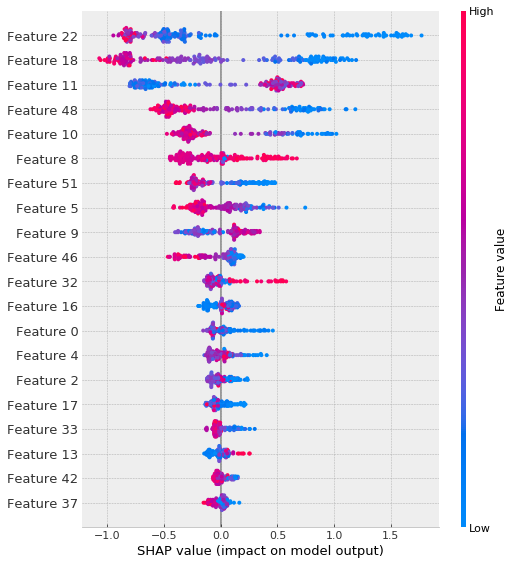

In [85]:
shap.summary_plot(shap_values, train_features[SIM_COLS].values)

In [86]:
SIM_COLS

['grate4-4_std',
 'grate12-1_std',
 'grate0-3_std',
 'grate8-3_std_norm',
 'grate4-3_std_norm',
 'grate4-4_std_norm',
 'grate0-1_std_norm',
 'grate8-4_std_norm',
 'grate11-3_min_norm',
 'grate0-1_min_norm',
 'grate8-4_min_norm',
 'grate11-3_max_norm',
 'grate8-2_max_norm',
 'grate11-1_jitter',
 'grate11-2_jitter',
 'grate11-3_jitter',
 'grate8-1_jitter',
 'grate8-2_jitter',
 'grate4-1_jitter',
 'grate1-2_jitter',
 'grate0-2_jitter',
 'grate0-4_jitter',
 'grate8-4_jitter',
 'grate11-1_trend',
 'grate11-2_trend',
 'grate11-3_trend',
 'grate11-4_trend',
 'grate8-1_trend',
 'grate8-2_trend',
 'grate8-3_trend',
 'grate4-1_trend',
 'grate4-2_trend',
 'grate4-3_trend',
 'grate4-4_trend',
 'grate1-1_trend',
 'grate1-2_trend',
 'grate12-1_trend',
 'grate12-2_trend',
 'grate0-1_trend',
 'grate0-2_trend',
 'grate0-3_trend',
 'grate0-4_trend',
 'grate8-4_trend',
 'grate11-1_jitter_norm',
 'grate11-2_jitter_norm',
 'grate8-1_jitter_norm',
 'grate8-2_jitter_norm',
 'grate8-3_jitter_norm',
 'grate4-1_jitter_norm',
 'grate12-2_jitter_norm',
 'grate0-2_jitter_norm',
 'grate8-4_jitter_norm']

In [98]:
text_file = open("SIM_COLS.txt", "r")
lines = text_file.read().split('\n')

In [101]:
lines = lines[:-1]

In [96]:
SIM_COLS

['grate4-4_std',
 'grate12-1_std',
 'grate0-3_std',
 'grate8-3_std_norm',
 'grate4-3_std_norm',
 'grate4-4_std_norm',
 'grate0-1_std_norm',
 'grate8-4_std_norm',
 'grate11-3_min_norm',
 'grate0-1_min_norm',
 'grate8-4_min_norm',
 'grate11-3_max_norm',
 'grate8-2_max_norm',
 'grate11-1_jitter',
 'grate11-2_jitter',
 'grate11-3_jitter',
 'grate8-1_jitter',
 'grate8-2_jitter',
 'grate4-1_jitter',
 'grate1-2_jitter',
 'grate0-2_jitter',
 'grate0-4_jitter',
 'grate8-4_jitter',
 'grate11-1_trend',
 'grate11-2_trend',
 'grate11-3_trend',
 'grate11-4_trend',
 'grate8-1_trend',
 'grate8-2_trend',
 'grate8-3_trend',
 'grate4-1_trend',
 'grate4-2_trend',
 'grate4-3_trend',
 'grate4-4_trend',
 'grate1-1_trend',
 'grate1-2_trend',
 'grate12-1_trend',
 'grate12-2_trend',
 'grate0-1_trend',
 'grate0-2_trend',
 'grate0-3_trend',
 'grate0-4_trend',
 'grate8-4_trend',
 'grate11-1_jitter_norm',
 'grate11-2_jitter_norm',
 'grate8-1_jitter_norm',
 'grate8-2_jitter_norm',
 'grate8-3_jitter_norm',
 'grate4-1_jitter_norm',
 'grate12-2_jitter_norm',
 'grate0-2_jitter_norm',
 'grate8-4_jitter_norm']